In [1]:
from PIL import Image
import numpy as np
from skimage import transform
import os
import shutil
import tensorflow as tf
from tensorflow import keras
import cv2


def load(image):
      
    np_image = np.array(image).astype('float32')/255
    np_image = transform.resize(np_image, (128,128, 3))
    np_image = np.expand_dims(np_image, axis=0)
    return np_image

def predict_result(image):
    outputs = model.predict(image)  
    
    s = outputs[0][0]
    if s >= 0.98:  
        status = 1
        return s, status        
    else:
        status = 0
        return s, status

In [2]:
def get_two_area_stdev(gray_image):

    
    cropped = gray_image[0:16, 0:32]
    crop2 = gray_image[16:24, 0:32]

    arr = np.array(cropped)
    arr2 = arr.flatten()

    arr_b = np.array(crop2)
    arr_b2 = arr_b.flatten()

    a = np.std(arr2, ddof=1)
    b = np.std(arr_b2, ddof=1)

    return a,b

In [3]:
def magic_eraser(img, threshold):
    img_copy = img
    shape = img.shape
    ymax = shape[0]
    xmax = shape[1]
    for i in range(ymax):   
        for j in range(xmax):
            count = 0
            adjacent_list = []  

            now_pixel = int(img[i][j])

            if j-1 >= 0:
                count+=1
                up_pixel = int(img[i][j-1])

                if abs(up_pixel - now_pixel) > threshold:               
                    adjacent_list.append(up_pixel)            

            if j+1 < xmax:
                count+=1
                down_pixel = int(img[i][j+1])

                if abs(down_pixel - now_pixel) > threshold:               
                    adjacent_list.append(down_pixel)   

            if i-1 >= 0:
                count+=1
                left_pixel = int(img[i-1][j])

                if abs(left_pixel - now_pixel) > threshold:               
                    adjacent_list.append(left_pixel) 

            if i+1 < ymax:
                count+=1
                right_pixel = int(img[i+1][j])

                if abs(right_pixel - now_pixel) > threshold:  
                    adjacent_list.append(right_pixel)

            if count == len(adjacent_list):

                average = int(sum(adjacent_list)/count)          
                img_copy[i][j] = average 
        
    return img_copy

In [4]:
def list_to_stack(list_a, restrict):
    if len(list_a)>restrict:
        list_a.pop(0)   

In [5]:
def leave_bed_algorithm(l,b):
    
    if l == [10,11,10] or l == [10,1,10] :       
        if all([b[i] > b[i+1] for i in range(len(b)-1)]):
            ans = "leave bed"
            l = []
            b = []
            return ans, l, b
        else:
            ans = "still on bed"
            l = []
            b = []
            return ans, l, b
            
    elif l == [10,11,0] or l == [10,1,0] or l == [11, 1, 0] or l == [1,11,0]:
        ans = "leave bed"
        l = []
        b = []
        return ans, l, b
    else:
        ans = "do not care"
        return ans,l,b

## start

In [6]:
model_path = r"C:\Users\ee527\Dementia_Vision_beta\model\test.h5"
model = tf.keras.models.load_model(model_path)

In [17]:
directory_name = r"D:\Dementia_Data_Preprocessing\testing_data\20211025\all"

In [18]:
num_count = 0
pre = 0
l = []
b = []
find = []


find_time = []
time = []
plot_bed = []
plot_floor = []
plot_old = []
for file_name in os.listdir(directory_name):
    print(file_name)
    num_count = num_count+1  
  
    image_path = directory_name + "/" + file_name  
    raw = cv2.imread(image_path,0)
    
    bed_dev, floor_dev = get_two_area_stdev(raw)
    bed_dev = int(bed_dev)
    floor_dev = int(floor_dev)
    
    ################################################
#     plot_bed.append(bed_dev)
#     plot_floor.append(floor_dev)
    ################################################
       
        
    # 圖片前處理
    process1 = magic_eraser(raw, threshold=15)
    process1_copy = process1.copy()
    process1[0:16, 0:32] = 0
    process1_copy[16:24, 0:32] = 0    
    
#     cv2.imwrite( r"D:\test99\b" + "/" + file_name, process1_copy) 
#     cv2.imwrite( r"D:\test99\f" + "/" + file_name, process1) 
   
    # 開始預測
    image1 = load(process1_copy)
    image2 = load(process1)
    score1, result1 = predict_result(image1)
    score2, result2 = predict_result(image2)
    
    ########################################
#     mm = magic_eraser(raw, threshold=15)
#     aaa = load(mm)
#     score, result = predict_result(aaa)
#     plot_old.append(result)
    ########################################
    
    # 預測結果: 0,1,10,11
    final = result1 * 10 + result2
    #print(final)
     
    # 狀態變化才紀錄
    if pre != final:
        l.append(final)
        
    # 隨時更新   
    b.append(bed_dev)
    
    list_to_stack(l, restrict=3)
    list_to_stack(b, restrict=3)   
    #print(l,b)
    
    ans,l,b = leave_bed_algorithm(l,b)       
    
    if ans == "leave bed":
        print(file_name)
        print("leave bed")
        find.append(file_name)
#         find_time.append(num_count)
    elif ans == "still on bed":
        print(file_name)
        print("still on bed")
        
        
    time.append(num_count)   
    pre = final

20211025_t000000.jpg
20211025_t000002.jpg
20211025_t000004.jpg
20211025_t000006.jpg
20211025_t000008.jpg
20211025_t000010.jpg
20211025_t000012.jpg
20211025_t000014.jpg
20211025_t000016.jpg
20211025_t000018.jpg
20211025_t000020.jpg
20211025_t000022.jpg
20211025_t000024.jpg
20211025_t000026.jpg
20211025_t000028.jpg
20211025_t000030.jpg
20211025_t000032.jpg
20211025_t000034.jpg
20211025_t000036.jpg
20211025_t000038.jpg
20211025_t000040.jpg
20211025_t000042.jpg
20211025_t000044.jpg
20211025_t000046.jpg
20211025_t000048.jpg
20211025_t000050.jpg
20211025_t000052.jpg
20211025_t000054.jpg
20211025_t000056.jpg
20211025_t000058.jpg
20211025_t000100.jpg
20211025_t000102.jpg
20211025_t000104.jpg
20211025_t000106.jpg
20211025_t000108.jpg
20211025_t000110.jpg
20211025_t000112.jpg
20211025_t000114.jpg
20211025_t000116.jpg
20211025_t000118.jpg
20211025_t000120.jpg
20211025_t000122.jpg
20211025_t000124.jpg
20211025_t000126.jpg
20211025_t000128.jpg
20211025_t000130.jpg
20211025_t000132.jpg
20211025_t000

20211025_t001302.jpg
20211025_t001304.jpg
20211025_t001306.jpg
20211025_t001308.jpg
20211025_t001310.jpg
20211025_t001312.jpg
20211025_t001314.jpg
20211025_t001316.jpg
20211025_t001318.jpg
20211025_t001320.jpg
20211025_t001322.jpg
20211025_t001324.jpg
20211025_t001326.jpg
20211025_t001328.jpg
20211025_t001330.jpg
20211025_t001332.jpg
20211025_t001334.jpg
20211025_t001336.jpg
20211025_t001338.jpg
20211025_t001340.jpg
20211025_t001342.jpg
20211025_t001344.jpg
20211025_t001346.jpg
20211025_t001348.jpg
20211025_t001350.jpg
20211025_t001352.jpg
20211025_t001354.jpg
20211025_t001356.jpg
20211025_t001358.jpg
20211025_t001400.jpg
20211025_t001402.jpg
20211025_t001404.jpg
20211025_t001406.jpg
20211025_t001408.jpg
20211025_t001410.jpg
20211025_t001412.jpg
20211025_t001414.jpg
20211025_t001416.jpg
20211025_t001418.jpg
20211025_t001420.jpg
20211025_t001422.jpg
20211025_t001424.jpg
20211025_t001426.jpg
20211025_t001428.jpg
20211025_t001430.jpg
20211025_t001432.jpg
20211025_t001434.jpg
20211025_t001

20211025_t002610.jpg
20211025_t002612.jpg
20211025_t002614.jpg
20211025_t002616.jpg
20211025_t002618.jpg
20211025_t002620.jpg
20211025_t002622.jpg
20211025_t002624.jpg
20211025_t002626.jpg
20211025_t002628.jpg
20211025_t002630.jpg
20211025_t002632.jpg
20211025_t002634.jpg
20211025_t002636.jpg
20211025_t002638.jpg
20211025_t002640.jpg
20211025_t002642.jpg
20211025_t002644.jpg
20211025_t002646.jpg
20211025_t002648.jpg
20211025_t002650.jpg
20211025_t002652.jpg
20211025_t002654.jpg
20211025_t002656.jpg
20211025_t002658.jpg
20211025_t002700.jpg
20211025_t002702.jpg
20211025_t002704.jpg
20211025_t002706.jpg
20211025_t002708.jpg
20211025_t002710.jpg
20211025_t002712.jpg
20211025_t002714.jpg
20211025_t002716.jpg
20211025_t002718.jpg
20211025_t002720.jpg
20211025_t002722.jpg
20211025_t002724.jpg
20211025_t002726.jpg
20211025_t002728.jpg
20211025_t002730.jpg
20211025_t002732.jpg
20211025_t002734.jpg
20211025_t002736.jpg
20211025_t002738.jpg
20211025_t002740.jpg
20211025_t002742.jpg
20211025_t002

20211025_t003914.jpg
20211025_t003916.jpg
20211025_t003918.jpg
20211025_t003920.jpg
20211025_t003922.jpg
20211025_t003924.jpg
20211025_t003926.jpg
20211025_t003928.jpg
20211025_t003930.jpg
20211025_t003932.jpg
20211025_t003934.jpg
20211025_t003936.jpg
20211025_t003938.jpg
20211025_t003940.jpg
20211025_t003942.jpg
20211025_t003944.jpg
20211025_t003946.jpg
20211025_t003948.jpg
20211025_t003950.jpg
20211025_t003952.jpg
20211025_t003954.jpg
20211025_t003956.jpg
20211025_t003958.jpg
20211025_t004000.jpg
20211025_t004002.jpg
20211025_t004004.jpg
20211025_t004006.jpg
20211025_t004008.jpg
20211025_t004010.jpg
20211025_t004012.jpg
20211025_t004014.jpg
20211025_t004016.jpg
20211025_t004018.jpg
20211025_t004020.jpg
20211025_t004022.jpg
20211025_t004024.jpg
20211025_t004026.jpg
20211025_t004028.jpg
20211025_t004030.jpg
20211025_t004032.jpg
20211025_t004034.jpg
20211025_t004036.jpg
20211025_t004038.jpg
20211025_t004040.jpg
20211025_t004042.jpg
20211025_t004044.jpg
20211025_t004046.jpg
20211025_t004

20211025_t005218.jpg
20211025_t005220.jpg
20211025_t005222.jpg
20211025_t005224.jpg
20211025_t005226.jpg
20211025_t005228.jpg
20211025_t005230.jpg
20211025_t005232.jpg
20211025_t005234.jpg
20211025_t005236.jpg
20211025_t005238.jpg
20211025_t005240.jpg
20211025_t005242.jpg
20211025_t005244.jpg
20211025_t005246.jpg
20211025_t005248.jpg
20211025_t005250.jpg
20211025_t005252.jpg
20211025_t005254.jpg
20211025_t005256.jpg
20211025_t005258.jpg
20211025_t005300.jpg
20211025_t005302.jpg
20211025_t005304.jpg
20211025_t005306.jpg
20211025_t005308.jpg
20211025_t005310.jpg
20211025_t005312.jpg
20211025_t005314.jpg
20211025_t005316.jpg
20211025_t005318.jpg
20211025_t005320.jpg
20211025_t005322.jpg
20211025_t005324.jpg
20211025_t005326.jpg
20211025_t005328.jpg
20211025_t005330.jpg
20211025_t005332.jpg
20211025_t005334.jpg
20211025_t005336.jpg
20211025_t005338.jpg
20211025_t005340.jpg
20211025_t005342.jpg
20211025_t005344.jpg
20211025_t005346.jpg
20211025_t005348.jpg
20211025_t005350.jpg
20211025_t005

20211025_t010520.jpg
20211025_t010522.jpg
20211025_t010524.jpg
20211025_t010526.jpg
20211025_t010528.jpg
20211025_t010530.jpg
20211025_t010532.jpg
20211025_t010534.jpg
20211025_t010536.jpg
20211025_t010538.jpg
20211025_t010540.jpg
20211025_t010542.jpg
20211025_t010544.jpg
20211025_t010546.jpg
20211025_t010548.jpg
20211025_t010550.jpg
20211025_t010552.jpg
20211025_t010554.jpg
20211025_t010556.jpg
20211025_t010558.jpg
20211025_t010600.jpg
20211025_t010602.jpg
20211025_t010604.jpg
20211025_t010606.jpg
20211025_t010608.jpg
20211025_t010610.jpg
20211025_t010612.jpg
20211025_t010614.jpg
20211025_t010616.jpg
20211025_t010618.jpg
20211025_t010620.jpg
20211025_t010622.jpg
20211025_t010624.jpg
20211025_t010626.jpg
20211025_t010628.jpg
20211025_t010630.jpg
20211025_t010632.jpg
20211025_t010634.jpg
20211025_t010636.jpg
20211025_t010638.jpg
20211025_t010640.jpg
20211025_t010642.jpg
20211025_t010644.jpg
20211025_t010646.jpg
20211025_t010648.jpg
20211025_t010650.jpg
20211025_t010652.jpg
20211025_t010

20211025_t011824.jpg
20211025_t011826.jpg
20211025_t011828.jpg
20211025_t011830.jpg
20211025_t011832.jpg
20211025_t011834.jpg
20211025_t011836.jpg
20211025_t011838.jpg
20211025_t011840.jpg
20211025_t011842.jpg
20211025_t011844.jpg
20211025_t011846.jpg
20211025_t011848.jpg
20211025_t011850.jpg
20211025_t011852.jpg
20211025_t011854.jpg
20211025_t011856.jpg
20211025_t011858.jpg
20211025_t011900.jpg
20211025_t011902.jpg
20211025_t011904.jpg
20211025_t011906.jpg
20211025_t011908.jpg
20211025_t011910.jpg
20211025_t011912.jpg
20211025_t011914.jpg
20211025_t011916.jpg
20211025_t011918.jpg
20211025_t011920.jpg
20211025_t011922.jpg
20211025_t011924.jpg
20211025_t011926.jpg
20211025_t011928.jpg
20211025_t011930.jpg
20211025_t011932.jpg
20211025_t011934.jpg
20211025_t011936.jpg
20211025_t011938.jpg
20211025_t011940.jpg
20211025_t011942.jpg
20211025_t011944.jpg
20211025_t011946.jpg
20211025_t011948.jpg
20211025_t011950.jpg
20211025_t011952.jpg
20211025_t011954.jpg
20211025_t011956.jpg
20211025_t011

20211025_t013128.jpg
20211025_t013130.jpg
20211025_t013132.jpg
20211025_t013134.jpg
20211025_t013136.jpg
20211025_t013138.jpg
20211025_t013140.jpg
20211025_t013142.jpg
20211025_t013144.jpg
20211025_t013146.jpg
20211025_t013148.jpg
20211025_t013150.jpg
20211025_t013152.jpg
20211025_t013154.jpg
20211025_t013156.jpg
20211025_t013158.jpg
20211025_t013200.jpg
20211025_t013202.jpg
20211025_t013204.jpg
20211025_t013206.jpg
20211025_t013208.jpg
20211025_t013210.jpg
20211025_t013212.jpg
20211025_t013214.jpg
20211025_t013216.jpg
20211025_t013218.jpg
20211025_t013220.jpg
20211025_t013222.jpg
20211025_t013224.jpg
20211025_t013226.jpg
20211025_t013228.jpg
20211025_t013230.jpg
20211025_t013232.jpg
20211025_t013234.jpg
20211025_t013236.jpg
20211025_t013238.jpg
20211025_t013240.jpg
20211025_t013242.jpg
20211025_t013244.jpg
20211025_t013246.jpg
20211025_t013248.jpg
20211025_t013250.jpg
20211025_t013252.jpg
20211025_t013254.jpg
20211025_t013256.jpg
20211025_t013258.jpg
20211025_t013300.jpg
20211025_t013

20211025_t014434.jpg
20211025_t014436.jpg
20211025_t014438.jpg
20211025_t014440.jpg
20211025_t014442.jpg
20211025_t014444.jpg
20211025_t014446.jpg
20211025_t014448.jpg
20211025_t014450.jpg
20211025_t014452.jpg
20211025_t014454.jpg
20211025_t014456.jpg
20211025_t014458.jpg
20211025_t014500.jpg
20211025_t014502.jpg
20211025_t014504.jpg
20211025_t014506.jpg
20211025_t014508.jpg
20211025_t014510.jpg
20211025_t014512.jpg
20211025_t014514.jpg
20211025_t014516.jpg
20211025_t014518.jpg
20211025_t014520.jpg
20211025_t014522.jpg
20211025_t014524.jpg
20211025_t014526.jpg
20211025_t014528.jpg
20211025_t014530.jpg
20211025_t014532.jpg
20211025_t014534.jpg
20211025_t014536.jpg
20211025_t014538.jpg
20211025_t014540.jpg
20211025_t014542.jpg
20211025_t014544.jpg
20211025_t014546.jpg
20211025_t014548.jpg
20211025_t014550.jpg
20211025_t014552.jpg
20211025_t014554.jpg
20211025_t014556.jpg
20211025_t014558.jpg
20211025_t014600.jpg
20211025_t014602.jpg
20211025_t014604.jpg
20211025_t014606.jpg
20211025_t014

20211025_t015736.jpg
20211025_t015738.jpg
20211025_t015740.jpg
20211025_t015742.jpg
20211025_t015744.jpg
20211025_t015746.jpg
20211025_t015748.jpg
20211025_t015750.jpg
20211025_t015752.jpg
20211025_t015754.jpg
20211025_t015756.jpg
20211025_t015758.jpg
20211025_t015800.jpg
20211025_t015802.jpg
20211025_t015804.jpg
20211025_t015806.jpg
20211025_t015808.jpg
20211025_t015810.jpg
20211025_t015812.jpg
20211025_t015814.jpg
20211025_t015816.jpg
20211025_t015818.jpg
20211025_t015820.jpg
20211025_t015822.jpg
20211025_t015824.jpg
20211025_t015826.jpg
20211025_t015828.jpg
20211025_t015830.jpg
20211025_t015832.jpg
20211025_t015834.jpg
20211025_t015836.jpg
20211025_t015838.jpg
20211025_t015840.jpg
20211025_t015842.jpg
20211025_t015844.jpg
20211025_t015846.jpg
20211025_t015848.jpg
20211025_t015850.jpg
20211025_t015852.jpg
20211025_t015854.jpg
20211025_t015856.jpg
20211025_t015858.jpg
20211025_t015900.jpg
20211025_t015902.jpg
20211025_t015904.jpg
20211025_t015906.jpg
20211025_t015908.jpg
20211025_t015

20211025_t021040.jpg
20211025_t021042.jpg
20211025_t021044.jpg
20211025_t021046.jpg
20211025_t021048.jpg
20211025_t021050.jpg
20211025_t021052.jpg
20211025_t021054.jpg
20211025_t021056.jpg
20211025_t021058.jpg
20211025_t021100.jpg
20211025_t021102.jpg
20211025_t021104.jpg
20211025_t021106.jpg
20211025_t021108.jpg
20211025_t021110.jpg
20211025_t021112.jpg
20211025_t021114.jpg
20211025_t021116.jpg
20211025_t021118.jpg
20211025_t021120.jpg
20211025_t021122.jpg
20211025_t021124.jpg
20211025_t021126.jpg
20211025_t021128.jpg
20211025_t021130.jpg
20211025_t021132.jpg
20211025_t021134.jpg
20211025_t021136.jpg
20211025_t021138.jpg
20211025_t021140.jpg
20211025_t021142.jpg
20211025_t021144.jpg
20211025_t021146.jpg
20211025_t021148.jpg
20211025_t021150.jpg
20211025_t021152.jpg
20211025_t021154.jpg
20211025_t021156.jpg
20211025_t021158.jpg
20211025_t021200.jpg
20211025_t021202.jpg
20211025_t021204.jpg
20211025_t021206.jpg
20211025_t021208.jpg
20211025_t021210.jpg
20211025_t021212.jpg
20211025_t021

20211025_t022344.jpg
20211025_t022346.jpg
20211025_t022348.jpg
20211025_t022350.jpg
20211025_t022352.jpg
20211025_t022354.jpg
20211025_t022356.jpg
20211025_t022358.jpg
20211025_t022400.jpg
20211025_t022402.jpg
20211025_t022404.jpg
20211025_t022406.jpg
20211025_t022408.jpg
20211025_t022410.jpg
20211025_t022412.jpg
20211025_t022414.jpg
20211025_t022416.jpg
20211025_t022418.jpg
20211025_t022420.jpg
20211025_t022422.jpg
20211025_t022424.jpg
20211025_t022426.jpg
20211025_t022428.jpg
20211025_t022430.jpg
20211025_t022432.jpg
20211025_t022434.jpg
20211025_t022436.jpg
20211025_t022438.jpg
20211025_t022440.jpg
20211025_t022442.jpg
20211025_t022444.jpg
20211025_t022446.jpg
20211025_t022448.jpg
20211025_t022450.jpg
20211025_t022452.jpg
20211025_t022454.jpg
20211025_t022456.jpg
20211025_t022458.jpg
20211025_t022500.jpg
20211025_t022502.jpg
20211025_t022504.jpg
20211025_t022506.jpg
20211025_t022508.jpg
20211025_t022510.jpg
20211025_t022512.jpg
20211025_t022514.jpg
20211025_t022516.jpg
20211025_t022

20211025_t023648.jpg
20211025_t023650.jpg
20211025_t023652.jpg
20211025_t023654.jpg
20211025_t023656.jpg
20211025_t023658.jpg
20211025_t023700.jpg
20211025_t023702.jpg
20211025_t023704.jpg
20211025_t023706.jpg
20211025_t023708.jpg
20211025_t023710.jpg
20211025_t023712.jpg
20211025_t023714.jpg
20211025_t023716.jpg
20211025_t023718.jpg
20211025_t023720.jpg
20211025_t023722.jpg
20211025_t023724.jpg
20211025_t023726.jpg
20211025_t023728.jpg
20211025_t023730.jpg
20211025_t023732.jpg
20211025_t023734.jpg
20211025_t023736.jpg
20211025_t023738.jpg
20211025_t023740.jpg
20211025_t023742.jpg
20211025_t023744.jpg
20211025_t023746.jpg
20211025_t023748.jpg
20211025_t023750.jpg
20211025_t023752.jpg
20211025_t023754.jpg
20211025_t023756.jpg
20211025_t023758.jpg
20211025_t023800.jpg
20211025_t023802.jpg
20211025_t023804.jpg
20211025_t023806.jpg
20211025_t023808.jpg
20211025_t023810.jpg
20211025_t023812.jpg
20211025_t023814.jpg
20211025_t023816.jpg
20211025_t023818.jpg
20211025_t023820.jpg
20211025_t023

20211025_t024952.jpg
20211025_t024954.jpg
20211025_t024956.jpg
20211025_t024958.jpg
20211025_t025000.jpg
20211025_t025002.jpg
20211025_t025004.jpg
20211025_t025006.jpg
20211025_t025008.jpg
20211025_t025010.jpg
20211025_t025012.jpg
20211025_t025014.jpg
20211025_t025016.jpg
20211025_t025018.jpg
20211025_t025020.jpg
20211025_t025022.jpg
20211025_t025024.jpg
20211025_t025026.jpg
20211025_t025028.jpg
20211025_t025030.jpg
20211025_t025032.jpg
20211025_t025034.jpg
20211025_t025036.jpg
20211025_t025038.jpg
20211025_t025040.jpg
20211025_t025042.jpg
20211025_t025044.jpg
20211025_t025046.jpg
20211025_t025048.jpg
20211025_t025050.jpg
20211025_t025052.jpg
20211025_t025054.jpg
20211025_t025056.jpg
20211025_t025058.jpg
20211025_t025100.jpg
20211025_t025102.jpg
20211025_t025104.jpg
20211025_t025106.jpg
20211025_t025108.jpg
20211025_t025110.jpg
20211025_t025112.jpg
20211025_t025114.jpg
20211025_t025116.jpg
20211025_t025118.jpg
20211025_t025120.jpg
20211025_t025122.jpg
20211025_t025124.jpg
20211025_t025

20211025_t030256.jpg
20211025_t030258.jpg
20211025_t030300.jpg
20211025_t030302.jpg
20211025_t030304.jpg
20211025_t030306.jpg
20211025_t030308.jpg
20211025_t030310.jpg
20211025_t030312.jpg
20211025_t030314.jpg
20211025_t030316.jpg
20211025_t030318.jpg
20211025_t030320.jpg
20211025_t030322.jpg
20211025_t030324.jpg
20211025_t030326.jpg
20211025_t030328.jpg
20211025_t030330.jpg
20211025_t030332.jpg
20211025_t030334.jpg
20211025_t030336.jpg
20211025_t030338.jpg
20211025_t030340.jpg
20211025_t030342.jpg
20211025_t030344.jpg
20211025_t030346.jpg
20211025_t030348.jpg
20211025_t030350.jpg
20211025_t030352.jpg
20211025_t030354.jpg
20211025_t030356.jpg
20211025_t030358.jpg
20211025_t030400.jpg
20211025_t030402.jpg
20211025_t030404.jpg
20211025_t030406.jpg
20211025_t030408.jpg
20211025_t030410.jpg
20211025_t030412.jpg
20211025_t030414.jpg
20211025_t030416.jpg
20211025_t030418.jpg
20211025_t030420.jpg
20211025_t030422.jpg
20211025_t030424.jpg
20211025_t030426.jpg
20211025_t030428.jpg
20211025_t030

20211025_t031600.jpg
20211025_t031602.jpg
20211025_t031604.jpg
20211025_t031606.jpg
20211025_t031608.jpg
20211025_t031610.jpg
20211025_t031612.jpg
20211025_t031614.jpg
20211025_t031616.jpg
20211025_t031618.jpg
20211025_t031620.jpg
20211025_t031622.jpg
20211025_t031624.jpg
20211025_t031626.jpg
20211025_t031628.jpg
20211025_t031630.jpg
20211025_t031632.jpg
20211025_t031634.jpg
20211025_t031636.jpg
20211025_t031638.jpg
20211025_t031640.jpg
20211025_t031642.jpg
20211025_t031644.jpg
20211025_t031646.jpg
20211025_t031648.jpg
20211025_t031650.jpg
20211025_t031652.jpg
20211025_t031654.jpg
20211025_t031656.jpg
20211025_t031658.jpg
20211025_t031700.jpg
20211025_t031702.jpg
20211025_t031704.jpg
20211025_t031706.jpg
20211025_t031708.jpg
20211025_t031710.jpg
20211025_t031712.jpg
20211025_t031714.jpg
20211025_t031716.jpg
20211025_t031718.jpg
20211025_t031720.jpg
20211025_t031722.jpg
20211025_t031724.jpg
20211025_t031726.jpg
20211025_t031728.jpg
20211025_t031730.jpg
20211025_t031732.jpg
20211025_t031

20211025_t032906.jpg
20211025_t032908.jpg
20211025_t032910.jpg
20211025_t032912.jpg
20211025_t032914.jpg
20211025_t032916.jpg
20211025_t032918.jpg
20211025_t032920.jpg
20211025_t032922.jpg
20211025_t032924.jpg
20211025_t032926.jpg
20211025_t032928.jpg
20211025_t032930.jpg
20211025_t032932.jpg
20211025_t032934.jpg
20211025_t032936.jpg
20211025_t032938.jpg
20211025_t032940.jpg
20211025_t032942.jpg
20211025_t032944.jpg
20211025_t032946.jpg
20211025_t032948.jpg
20211025_t032950.jpg
20211025_t032952.jpg
20211025_t032954.jpg
20211025_t032956.jpg
20211025_t032958.jpg
20211025_t033000.jpg
20211025_t033002.jpg
20211025_t033004.jpg
20211025_t033006.jpg
20211025_t033008.jpg
20211025_t033010.jpg
20211025_t033012.jpg
20211025_t033014.jpg
20211025_t033016.jpg
20211025_t033018.jpg
20211025_t033020.jpg
20211025_t033022.jpg
20211025_t033024.jpg
20211025_t033026.jpg
20211025_t033028.jpg
20211025_t033030.jpg
20211025_t033032.jpg
20211025_t033034.jpg
20211025_t033036.jpg
20211025_t033038.jpg
20211025_t033

20211025_t034212.jpg
20211025_t034214.jpg
20211025_t034216.jpg
20211025_t034218.jpg
20211025_t034220.jpg
20211025_t034222.jpg
20211025_t034224.jpg
20211025_t034226.jpg
20211025_t034228.jpg
20211025_t034230.jpg
20211025_t034232.jpg
20211025_t034234.jpg
20211025_t034236.jpg
20211025_t034238.jpg
20211025_t034240.jpg
20211025_t034242.jpg
20211025_t034244.jpg
20211025_t034246.jpg
20211025_t034248.jpg
20211025_t034250.jpg
20211025_t034252.jpg
20211025_t034254.jpg
20211025_t034256.jpg
20211025_t034258.jpg
20211025_t034300.jpg
20211025_t034302.jpg
20211025_t034304.jpg
20211025_t034306.jpg
20211025_t034308.jpg
20211025_t034310.jpg
20211025_t034312.jpg
20211025_t034314.jpg
20211025_t034316.jpg
20211025_t034318.jpg
20211025_t034320.jpg
20211025_t034322.jpg
20211025_t034324.jpg
20211025_t034326.jpg
20211025_t034328.jpg
20211025_t034330.jpg
20211025_t034332.jpg
20211025_t034334.jpg
20211025_t034336.jpg
20211025_t034338.jpg
20211025_t034340.jpg
20211025_t034342.jpg
20211025_t034344.jpg
20211025_t034

20211025_t035516.jpg
20211025_t035518.jpg
20211025_t035520.jpg
20211025_t035522.jpg
20211025_t035524.jpg
20211025_t035526.jpg
20211025_t035528.jpg
20211025_t035530.jpg
20211025_t035532.jpg
20211025_t035534.jpg
20211025_t035536.jpg
20211025_t035538.jpg
20211025_t035540.jpg
20211025_t035542.jpg
20211025_t035544.jpg
20211025_t035546.jpg
20211025_t035548.jpg
20211025_t035550.jpg
20211025_t035552.jpg
20211025_t035554.jpg
20211025_t035556.jpg
20211025_t035558.jpg
20211025_t035600.jpg
20211025_t035602.jpg
20211025_t035604.jpg
20211025_t035606.jpg
20211025_t035608.jpg
20211025_t035610.jpg
20211025_t035612.jpg
20211025_t035614.jpg
20211025_t035616.jpg
20211025_t035618.jpg
20211025_t035620.jpg
20211025_t035622.jpg
20211025_t035624.jpg
20211025_t035626.jpg
20211025_t035628.jpg
20211025_t035630.jpg
20211025_t035632.jpg
20211025_t035634.jpg
20211025_t035636.jpg
20211025_t035638.jpg
20211025_t035640.jpg
20211025_t035642.jpg
20211025_t035644.jpg
20211025_t035646.jpg
20211025_t035648.jpg
20211025_t035

20211025_t040820.jpg
20211025_t040822.jpg
20211025_t040824.jpg
20211025_t040826.jpg
20211025_t040828.jpg
20211025_t040830.jpg
20211025_t040832.jpg
20211025_t040834.jpg
20211025_t040836.jpg
20211025_t040838.jpg
20211025_t040840.jpg
20211025_t040842.jpg
20211025_t040844.jpg
20211025_t040846.jpg
20211025_t040848.jpg
20211025_t040850.jpg
20211025_t040852.jpg
20211025_t040854.jpg
20211025_t040856.jpg
20211025_t040858.jpg
20211025_t040900.jpg
20211025_t040902.jpg
20211025_t040904.jpg
20211025_t040906.jpg
20211025_t040908.jpg
20211025_t040910.jpg
20211025_t040912.jpg
20211025_t040914.jpg
20211025_t040916.jpg
20211025_t040918.jpg
20211025_t040920.jpg
20211025_t040922.jpg
20211025_t040924.jpg
20211025_t040926.jpg
20211025_t040928.jpg
20211025_t040930.jpg
20211025_t040932.jpg
20211025_t040934.jpg
20211025_t040936.jpg
20211025_t040938.jpg
20211025_t040940.jpg
20211025_t040942.jpg
20211025_t040944.jpg
20211025_t040946.jpg
20211025_t040948.jpg
20211025_t040950.jpg
20211025_t040952.jpg
20211025_t040

20211025_t042122.jpg
20211025_t042124.jpg
20211025_t042126.jpg
20211025_t042128.jpg
20211025_t042132.jpg
20211025_t042134.jpg
20211025_t042136.jpg
20211025_t042138.jpg
20211025_t042140.jpg
20211025_t042142.jpg
20211025_t042144.jpg
20211025_t042146.jpg
20211025_t042148.jpg
20211025_t042150.jpg
20211025_t042152.jpg
20211025_t042154.jpg
20211025_t042156.jpg
20211025_t042158.jpg
20211025_t042200.jpg
20211025_t042202.jpg
20211025_t042204.jpg
20211025_t042206.jpg
20211025_t042208.jpg
20211025_t042210.jpg
20211025_t042212.jpg
20211025_t042214.jpg
20211025_t042216.jpg
20211025_t042218.jpg
20211025_t042220.jpg
20211025_t042222.jpg
20211025_t042224.jpg
20211025_t042226.jpg
20211025_t042228.jpg
20211025_t042230.jpg
20211025_t042232.jpg
20211025_t042234.jpg
20211025_t042236.jpg
20211025_t042238.jpg
20211025_t042240.jpg
20211025_t042242.jpg
20211025_t042244.jpg
20211025_t042246.jpg
20211025_t042248.jpg
20211025_t042250.jpg
20211025_t042252.jpg
20211025_t042254.jpg
20211025_t042256.jpg
20211025_t042

20211025_t043430.jpg
20211025_t043432.jpg
20211025_t043434.jpg
20211025_t043436.jpg
20211025_t043438.jpg
20211025_t043440.jpg
20211025_t043442.jpg
20211025_t043444.jpg
20211025_t043446.jpg
20211025_t043448.jpg
20211025_t043450.jpg
20211025_t043452.jpg
20211025_t043454.jpg
20211025_t043456.jpg
20211025_t043458.jpg
20211025_t043500.jpg
20211025_t043502.jpg
20211025_t043504.jpg
20211025_t043506.jpg
20211025_t043508.jpg
20211025_t043510.jpg
20211025_t043512.jpg
20211025_t043514.jpg
20211025_t043516.jpg
20211025_t043518.jpg
20211025_t043520.jpg
20211025_t043522.jpg
20211025_t043524.jpg
20211025_t043526.jpg
20211025_t043528.jpg
20211025_t043530.jpg
20211025_t043532.jpg
20211025_t043534.jpg
20211025_t043536.jpg
20211025_t043538.jpg
20211025_t043540.jpg
20211025_t043542.jpg
20211025_t043544.jpg
20211025_t043546.jpg
20211025_t043548.jpg
20211025_t043550.jpg
20211025_t043552.jpg
20211025_t043554.jpg
20211025_t043556.jpg
20211025_t043558.jpg
20211025_t043600.jpg
20211025_t043602.jpg
20211025_t043

20211025_t044736.jpg
20211025_t044738.jpg
20211025_t044740.jpg
20211025_t044742.jpg
20211025_t044744.jpg
20211025_t044746.jpg
20211025_t044748.jpg
20211025_t044750.jpg
20211025_t044752.jpg
20211025_t044754.jpg
20211025_t044756.jpg
20211025_t044758.jpg
20211025_t044800.jpg
20211025_t044802.jpg
20211025_t044804.jpg
20211025_t044806.jpg
20211025_t044808.jpg
20211025_t044810.jpg
20211025_t044812.jpg
20211025_t044814.jpg
20211025_t044816.jpg
20211025_t044818.jpg
20211025_t044820.jpg
20211025_t044822.jpg
20211025_t044824.jpg
20211025_t044826.jpg
20211025_t044828.jpg
20211025_t044830.jpg
20211025_t044832.jpg
20211025_t044834.jpg
20211025_t044836.jpg
20211025_t044838.jpg
20211025_t044840.jpg
20211025_t044842.jpg
20211025_t044844.jpg
20211025_t044846.jpg
20211025_t044848.jpg
20211025_t044850.jpg
20211025_t044852.jpg
20211025_t044854.jpg
20211025_t044856.jpg
20211025_t044858.jpg
20211025_t044900.jpg
20211025_t044902.jpg
20211025_t044904.jpg
20211025_t044906.jpg
20211025_t044908.jpg
20211025_t044

20211025_t050040.jpg
20211025_t050042.jpg
20211025_t050044.jpg
20211025_t050046.jpg
20211025_t050048.jpg
20211025_t050050.jpg
20211025_t050052.jpg
20211025_t050054.jpg
20211025_t050056.jpg
20211025_t050058.jpg
20211025_t050100.jpg
20211025_t050102.jpg
20211025_t050104.jpg
20211025_t050106.jpg
20211025_t050108.jpg
20211025_t050110.jpg
20211025_t050112.jpg
20211025_t050114.jpg
20211025_t050116.jpg
20211025_t050118.jpg
20211025_t050120.jpg
20211025_t050122.jpg
20211025_t050124.jpg
20211025_t050126.jpg
20211025_t050128.jpg
20211025_t050130.jpg
20211025_t050132.jpg
20211025_t050134.jpg
20211025_t050136.jpg
20211025_t050138.jpg
20211025_t050140.jpg
20211025_t050142.jpg
20211025_t050144.jpg
20211025_t050146.jpg
20211025_t050148.jpg
20211025_t050150.jpg
20211025_t050152.jpg
20211025_t050154.jpg
20211025_t050156.jpg
20211025_t050158.jpg
20211025_t050200.jpg
20211025_t050202.jpg
20211025_t050204.jpg
20211025_t050206.jpg
20211025_t050208.jpg
20211025_t050210.jpg
20211025_t050212.jpg
20211025_t050

20211025_t051344.jpg
20211025_t051346.jpg
20211025_t051348.jpg
20211025_t051350.jpg
20211025_t051352.jpg
20211025_t051354.jpg
20211025_t051356.jpg
20211025_t051358.jpg
20211025_t051400.jpg
20211025_t051402.jpg
20211025_t051404.jpg
20211025_t051406.jpg
20211025_t051408.jpg
20211025_t051410.jpg
20211025_t051412.jpg
20211025_t051414.jpg
20211025_t051416.jpg
20211025_t051418.jpg
20211025_t051420.jpg
20211025_t051422.jpg
20211025_t051424.jpg
20211025_t051426.jpg
20211025_t051428.jpg
20211025_t051430.jpg
20211025_t051432.jpg
20211025_t051434.jpg
20211025_t051436.jpg
20211025_t051438.jpg
20211025_t051440.jpg
20211025_t051442.jpg
20211025_t051444.jpg
20211025_t051446.jpg
20211025_t051448.jpg
20211025_t051450.jpg
20211025_t051452.jpg
20211025_t051454.jpg
20211025_t051456.jpg
20211025_t051458.jpg
20211025_t051500.jpg
20211025_t051502.jpg
20211025_t051504.jpg
20211025_t051506.jpg
20211025_t051508.jpg
20211025_t051510.jpg
20211025_t051512.jpg
20211025_t051514.jpg
20211025_t051516.jpg
20211025_t051

20211025_t052652.jpg
20211025_t052654.jpg
20211025_t052656.jpg
20211025_t052658.jpg
20211025_t052700.jpg
20211025_t052702.jpg
20211025_t052704.jpg
20211025_t052706.jpg
20211025_t052708.jpg
20211025_t052710.jpg
20211025_t052712.jpg
20211025_t052714.jpg
20211025_t052716.jpg
20211025_t052718.jpg
20211025_t052720.jpg
20211025_t052722.jpg
20211025_t052724.jpg
20211025_t052726.jpg
20211025_t052728.jpg
20211025_t052730.jpg
20211025_t052732.jpg
20211025_t052734.jpg
20211025_t052736.jpg
20211025_t052738.jpg
20211025_t052740.jpg
20211025_t052742.jpg
20211025_t052744.jpg
20211025_t052746.jpg
20211025_t052748.jpg
20211025_t052750.jpg
20211025_t052752.jpg
20211025_t052754.jpg
20211025_t052756.jpg
20211025_t052758.jpg
20211025_t052800.jpg
20211025_t052802.jpg
20211025_t052804.jpg
20211025_t052806.jpg
20211025_t052808.jpg
20211025_t052810.jpg
20211025_t052812.jpg
20211025_t052814.jpg
20211025_t052816.jpg
20211025_t052818.jpg
20211025_t052820.jpg
20211025_t052822.jpg
20211025_t052824.jpg
20211025_t052

20211025_t053958.jpg
20211025_t054000.jpg
20211025_t054002.jpg
20211025_t054004.jpg
20211025_t054006.jpg
20211025_t054008.jpg
20211025_t054010.jpg
20211025_t054012.jpg
20211025_t054014.jpg
20211025_t054016.jpg
20211025_t054018.jpg
20211025_t054020.jpg
20211025_t054022.jpg
20211025_t054024.jpg
20211025_t054026.jpg
20211025_t054028.jpg
20211025_t054030.jpg
20211025_t054032.jpg
20211025_t054034.jpg
20211025_t054036.jpg
20211025_t054038.jpg
20211025_t054040.jpg
20211025_t054042.jpg
20211025_t054044.jpg
20211025_t054046.jpg
20211025_t054048.jpg
20211025_t054050.jpg
20211025_t054052.jpg
20211025_t054054.jpg
20211025_t054056.jpg
20211025_t054058.jpg
20211025_t054100.jpg
20211025_t054102.jpg
20211025_t054104.jpg
20211025_t054106.jpg
20211025_t054108.jpg
20211025_t054110.jpg
20211025_t054112.jpg
20211025_t054114.jpg
20211025_t054116.jpg
20211025_t054118.jpg
20211025_t054120.jpg
20211025_t054122.jpg
20211025_t054124.jpg
20211025_t054126.jpg
20211025_t054128.jpg
20211025_t054130.jpg
20211025_t054

20211025_t055302.jpg
20211025_t055304.jpg
20211025_t055306.jpg
20211025_t055308.jpg
20211025_t055310.jpg
20211025_t055312.jpg
20211025_t055314.jpg
20211025_t055316.jpg
20211025_t055318.jpg
20211025_t055320.jpg
20211025_t055322.jpg
20211025_t055324.jpg
20211025_t055326.jpg
20211025_t055328.jpg
20211025_t055330.jpg
20211025_t055332.jpg
20211025_t055334.jpg
20211025_t055336.jpg
20211025_t055338.jpg
20211025_t055340.jpg
20211025_t055342.jpg
20211025_t055344.jpg
20211025_t055346.jpg
20211025_t055348.jpg
20211025_t055350.jpg
20211025_t055352.jpg
20211025_t055354.jpg
20211025_t055356.jpg
20211025_t055358.jpg
20211025_t055400.jpg
20211025_t055402.jpg
20211025_t055404.jpg
20211025_t055406.jpg
20211025_t055408.jpg
20211025_t055410.jpg
20211025_t055412.jpg
20211025_t055414.jpg
20211025_t055416.jpg
20211025_t055418.jpg
20211025_t055420.jpg
20211025_t055422.jpg
20211025_t055424.jpg
20211025_t055426.jpg
20211025_t055428.jpg
20211025_t055430.jpg
20211025_t055432.jpg
20211025_t055434.jpg
20211025_t055

20211025_t060606.jpg
20211025_t060608.jpg
20211025_t060610.jpg
20211025_t060612.jpg
20211025_t060614.jpg
20211025_t060616.jpg
20211025_t060618.jpg
20211025_t060620.jpg
20211025_t060622.jpg
20211025_t060624.jpg
20211025_t060626.jpg
20211025_t060628.jpg
20211025_t060630.jpg
20211025_t060632.jpg
20211025_t060634.jpg
20211025_t060636.jpg
20211025_t060638.jpg
20211025_t060640.jpg
20211025_t060642.jpg
20211025_t060644.jpg
20211025_t060646.jpg
20211025_t060648.jpg
20211025_t060650.jpg
20211025_t060652.jpg
20211025_t060654.jpg
20211025_t060656.jpg
20211025_t060658.jpg
20211025_t060700.jpg
20211025_t060702.jpg
20211025_t060704.jpg
20211025_t060706.jpg
20211025_t060708.jpg
20211025_t060710.jpg
20211025_t060712.jpg
20211025_t060714.jpg
20211025_t060716.jpg
20211025_t060718.jpg
20211025_t060720.jpg
20211025_t060722.jpg
20211025_t060724.jpg
20211025_t060726.jpg
20211025_t060728.jpg
20211025_t060730.jpg
20211025_t060732.jpg
20211025_t060734.jpg
20211025_t060736.jpg
20211025_t060738.jpg
20211025_t060

20211025_t061912.jpg
20211025_t061914.jpg
20211025_t061916.jpg
20211025_t061918.jpg
20211025_t061920.jpg
20211025_t061922.jpg
20211025_t061924.jpg
20211025_t061926.jpg
20211025_t061928.jpg
20211025_t061930.jpg
20211025_t061932.jpg
20211025_t061934.jpg
20211025_t061936.jpg
20211025_t061938.jpg
20211025_t061940.jpg
20211025_t061942.jpg
20211025_t061944.jpg
20211025_t061946.jpg
20211025_t061948.jpg
20211025_t061950.jpg
20211025_t061952.jpg
20211025_t061954.jpg
20211025_t061956.jpg
20211025_t061958.jpg
20211025_t062000.jpg
20211025_t062002.jpg
20211025_t062004.jpg
20211025_t062006.jpg
20211025_t062008.jpg
20211025_t062010.jpg
20211025_t062012.jpg
20211025_t062014.jpg
20211025_t062016.jpg
20211025_t062018.jpg
20211025_t062020.jpg
20211025_t062022.jpg
20211025_t062024.jpg
20211025_t062026.jpg
20211025_t062028.jpg
20211025_t062030.jpg
20211025_t062032.jpg
20211025_t062034.jpg
20211025_t062036.jpg
20211025_t062038.jpg
20211025_t062040.jpg
20211025_t062042.jpg
20211025_t062044.jpg
20211025_t062

20211025_t063218.jpg
20211025_t063220.jpg
20211025_t063222.jpg
20211025_t063224.jpg
20211025_t063226.jpg
20211025_t063228.jpg
20211025_t063230.jpg
20211025_t063232.jpg
20211025_t063234.jpg
20211025_t063236.jpg
20211025_t063238.jpg
20211025_t063240.jpg
20211025_t063242.jpg
20211025_t063244.jpg
20211025_t063246.jpg
20211025_t063248.jpg
20211025_t063250.jpg
20211025_t063252.jpg
20211025_t063254.jpg
20211025_t063256.jpg
20211025_t063258.jpg
20211025_t063300.jpg
20211025_t063302.jpg
20211025_t063304.jpg
20211025_t063306.jpg
20211025_t063308.jpg
20211025_t063310.jpg
20211025_t063312.jpg
20211025_t063314.jpg
20211025_t063316.jpg
20211025_t063318.jpg
20211025_t063320.jpg
20211025_t063322.jpg
20211025_t063324.jpg
20211025_t063326.jpg
20211025_t063328.jpg
20211025_t063330.jpg
20211025_t063332.jpg
20211025_t063334.jpg
20211025_t063336.jpg
20211025_t063338.jpg
20211025_t063340.jpg
20211025_t063342.jpg
20211025_t063344.jpg
20211025_t063346.jpg
20211025_t063348.jpg
20211025_t063350.jpg
20211025_t063

20211025_t064524.jpg
20211025_t064526.jpg
20211025_t064528.jpg
20211025_t064530.jpg
20211025_t064532.jpg
20211025_t064534.jpg
20211025_t064536.jpg
20211025_t064538.jpg
20211025_t064540.jpg
20211025_t064542.jpg
20211025_t064544.jpg
20211025_t064546.jpg
20211025_t064548.jpg
20211025_t064550.jpg
20211025_t064552.jpg
20211025_t064554.jpg
20211025_t064556.jpg
20211025_t064558.jpg
20211025_t064600.jpg
20211025_t064602.jpg
20211025_t064604.jpg
20211025_t064606.jpg
20211025_t064608.jpg
20211025_t064610.jpg
20211025_t064612.jpg
20211025_t064614.jpg
20211025_t064616.jpg
20211025_t064618.jpg
20211025_t064620.jpg
20211025_t064622.jpg
20211025_t064624.jpg
20211025_t064626.jpg
20211025_t064628.jpg
20211025_t064630.jpg
20211025_t064632.jpg
20211025_t064634.jpg
20211025_t064636.jpg
20211025_t064638.jpg
20211025_t064640.jpg
20211025_t064642.jpg
20211025_t064644.jpg
20211025_t064646.jpg
20211025_t064648.jpg
20211025_t064650.jpg
20211025_t064652.jpg
20211025_t064654.jpg
20211025_t064656.jpg
20211025_t064

20211025_t065828.jpg
20211025_t065830.jpg
20211025_t065832.jpg
20211025_t065834.jpg
20211025_t065836.jpg
20211025_t065838.jpg
20211025_t065840.jpg
20211025_t065842.jpg
20211025_t065844.jpg
20211025_t065846.jpg
20211025_t065848.jpg
20211025_t065850.jpg
20211025_t065852.jpg
20211025_t065854.jpg
20211025_t065856.jpg
20211025_t065858.jpg
20211025_t065900.jpg
20211025_t065902.jpg
20211025_t065904.jpg
20211025_t065906.jpg
20211025_t065908.jpg
20211025_t065910.jpg
20211025_t065912.jpg
20211025_t065914.jpg
20211025_t065916.jpg
20211025_t065918.jpg
20211025_t065920.jpg
20211025_t065922.jpg
20211025_t065924.jpg
20211025_t065926.jpg
20211025_t065928.jpg
20211025_t065930.jpg
20211025_t065932.jpg
20211025_t065934.jpg
20211025_t065936.jpg
20211025_t065938.jpg
20211025_t065940.jpg
20211025_t065942.jpg
20211025_t065944.jpg
20211025_t065946.jpg
20211025_t065948.jpg
20211025_t065950.jpg
20211025_t065952.jpg
20211025_t065954.jpg
20211025_t065956.jpg
20211025_t065958.jpg
20211025_t070000.jpg
20211025_t070

20211025_t071130.jpg
20211025_t071132.jpg
20211025_t071134.jpg
20211025_t071136.jpg
20211025_t071138.jpg
20211025_t071140.jpg
20211025_t071142.jpg
20211025_t071144.jpg
20211025_t071146.jpg
20211025_t071148.jpg
20211025_t071150.jpg
20211025_t071152.jpg
20211025_t071154.jpg
20211025_t071156.jpg
20211025_t071158.jpg
20211025_t071200.jpg
20211025_t071202.jpg
20211025_t071204.jpg
20211025_t071206.jpg
20211025_t071208.jpg
20211025_t071210.jpg
20211025_t071212.jpg
20211025_t071214.jpg
20211025_t071216.jpg
20211025_t071218.jpg
20211025_t071220.jpg
20211025_t071222.jpg
20211025_t071224.jpg
20211025_t071226.jpg
20211025_t071228.jpg
20211025_t071230.jpg
20211025_t071232.jpg
20211025_t071234.jpg
20211025_t071236.jpg
20211025_t071238.jpg
20211025_t071240.jpg
20211025_t071242.jpg
20211025_t071244.jpg
20211025_t071246.jpg
20211025_t071248.jpg
20211025_t071250.jpg
20211025_t071252.jpg
20211025_t071254.jpg
20211025_t071256.jpg
20211025_t071258.jpg
20211025_t071300.jpg
20211025_t071302.jpg
20211025_t071

20211025_t072432.jpg
20211025_t072434.jpg
20211025_t072436.jpg
20211025_t072438.jpg
20211025_t072440.jpg
20211025_t072442.jpg
20211025_t072444.jpg
20211025_t072446.jpg
20211025_t072448.jpg
20211025_t072450.jpg
20211025_t072452.jpg
20211025_t072454.jpg
20211025_t072456.jpg
20211025_t072458.jpg
20211025_t072500.jpg
20211025_t072502.jpg
20211025_t072504.jpg
20211025_t072506.jpg
20211025_t072508.jpg
20211025_t072510.jpg
20211025_t072512.jpg
20211025_t072514.jpg
20211025_t072516.jpg
20211025_t072518.jpg
20211025_t072520.jpg
20211025_t072522.jpg
20211025_t072524.jpg
20211025_t072526.jpg
20211025_t072528.jpg
20211025_t072530.jpg
20211025_t072532.jpg
20211025_t072534.jpg
20211025_t072536.jpg
20211025_t072538.jpg
20211025_t072540.jpg
20211025_t072542.jpg
20211025_t072544.jpg
20211025_t072546.jpg
20211025_t072548.jpg
20211025_t072550.jpg
20211025_t072552.jpg
20211025_t072554.jpg
20211025_t072556.jpg
20211025_t072558.jpg
20211025_t072600.jpg
20211025_t072602.jpg
20211025_t072604.jpg
20211025_t072

20211025_t073730.jpg
20211025_t073732.jpg
20211025_t073734.jpg
20211025_t073736.jpg
20211025_t073738.jpg
20211025_t073740.jpg
20211025_t073742.jpg
20211025_t073744.jpg
20211025_t073746.jpg
20211025_t073748.jpg
20211025_t073750.jpg
20211025_t073752.jpg
20211025_t073754.jpg
20211025_t073756.jpg
20211025_t073758.jpg
20211025_t073800.jpg
20211025_t073802.jpg
20211025_t073804.jpg
20211025_t073806.jpg
20211025_t073808.jpg
20211025_t073810.jpg
20211025_t073812.jpg
20211025_t073814.jpg
20211025_t073816.jpg
20211025_t073818.jpg
20211025_t073820.jpg
20211025_t073822.jpg
20211025_t073824.jpg
20211025_t073826.jpg
20211025_t073828.jpg
20211025_t073830.jpg
20211025_t073832.jpg
20211025_t073834.jpg
20211025_t073836.jpg
20211025_t073838.jpg
20211025_t073840.jpg
20211025_t073842.jpg
20211025_t073844.jpg
20211025_t073846.jpg
20211025_t073848.jpg
20211025_t073850.jpg
20211025_t073852.jpg
20211025_t073854.jpg
20211025_t073856.jpg
20211025_t073858.jpg
20211025_t073900.jpg
20211025_t073902.jpg
20211025_t073

20211025_t075036.jpg
20211025_t075038.jpg
20211025_t075040.jpg
20211025_t075042.jpg
20211025_t075044.jpg
20211025_t075046.jpg
20211025_t075048.jpg
20211025_t075050.jpg
20211025_t075052.jpg
20211025_t075054.jpg
20211025_t075056.jpg
20211025_t075058.jpg
20211025_t075100.jpg
20211025_t075102.jpg
20211025_t075104.jpg
20211025_t075106.jpg
20211025_t075108.jpg
20211025_t075110.jpg
20211025_t075112.jpg
20211025_t075114.jpg
20211025_t075116.jpg
20211025_t075118.jpg
20211025_t075120.jpg
20211025_t075122.jpg
20211025_t075124.jpg
20211025_t075126.jpg
20211025_t075128.jpg
20211025_t075130.jpg
20211025_t075132.jpg
20211025_t075134.jpg
20211025_t075136.jpg
20211025_t075138.jpg
20211025_t075140.jpg
20211025_t075142.jpg
20211025_t075144.jpg
20211025_t075146.jpg
20211025_t075148.jpg
20211025_t075150.jpg
20211025_t075152.jpg
20211025_t075154.jpg
20211025_t075156.jpg
20211025_t075158.jpg
20211025_t075200.jpg
20211025_t075202.jpg
20211025_t075204.jpg
20211025_t075206.jpg
20211025_t075208.jpg
20211025_t075

20211025_t080340.jpg
20211025_t080342.jpg
20211025_t080344.jpg
20211025_t080346.jpg
20211025_t080348.jpg
20211025_t080350.jpg
20211025_t080352.jpg
20211025_t080354.jpg
20211025_t080356.jpg
20211025_t080358.jpg
20211025_t080400.jpg
20211025_t080402.jpg
20211025_t080404.jpg
20211025_t080406.jpg
20211025_t080408.jpg
20211025_t080410.jpg
20211025_t080412.jpg
20211025_t080414.jpg
20211025_t080416.jpg
20211025_t080418.jpg
20211025_t080420.jpg
20211025_t080422.jpg
20211025_t080424.jpg
20211025_t080426.jpg
20211025_t080428.jpg
20211025_t080430.jpg
20211025_t080432.jpg
20211025_t080434.jpg
20211025_t080436.jpg
20211025_t080438.jpg
20211025_t080440.jpg
20211025_t080442.jpg
20211025_t080444.jpg
20211025_t080446.jpg
20211025_t080448.jpg
20211025_t080450.jpg
20211025_t080452.jpg
20211025_t080454.jpg
20211025_t080456.jpg
20211025_t080458.jpg
20211025_t080500.jpg
20211025_t080502.jpg
20211025_t080504.jpg
20211025_t080506.jpg
20211025_t080508.jpg
20211025_t080510.jpg
20211025_t080512.jpg
20211025_t080

20211025_t081644.jpg
20211025_t081646.jpg
20211025_t081648.jpg
20211025_t081650.jpg
20211025_t081652.jpg
20211025_t081654.jpg
20211025_t081656.jpg
20211025_t081658.jpg
20211025_t081700.jpg
20211025_t081702.jpg
20211025_t081704.jpg
20211025_t081706.jpg
20211025_t081708.jpg
20211025_t081710.jpg
20211025_t081712.jpg
20211025_t081714.jpg
20211025_t081716.jpg
20211025_t081718.jpg
20211025_t081720.jpg
20211025_t081722.jpg
20211025_t081724.jpg
20211025_t081726.jpg
20211025_t081728.jpg
20211025_t081730.jpg
20211025_t081732.jpg
20211025_t081734.jpg
20211025_t081736.jpg
20211025_t081738.jpg
20211025_t081740.jpg
20211025_t081742.jpg
20211025_t081744.jpg
20211025_t081746.jpg
20211025_t081748.jpg
20211025_t081750.jpg
20211025_t081752.jpg
20211025_t081754.jpg
20211025_t081756.jpg
20211025_t081758.jpg
20211025_t081800.jpg
20211025_t081802.jpg
20211025_t081804.jpg
20211025_t081806.jpg
20211025_t081808.jpg
20211025_t081810.jpg
20211025_t081812.jpg
20211025_t081814.jpg
20211025_t081816.jpg
20211025_t081

20211025_t082948.jpg
20211025_t082950.jpg
20211025_t082952.jpg
20211025_t082954.jpg
20211025_t082956.jpg
20211025_t082958.jpg
20211025_t083000.jpg
20211025_t083002.jpg
20211025_t083004.jpg
20211025_t083006.jpg
20211025_t083008.jpg
20211025_t083010.jpg
20211025_t083012.jpg
20211025_t083014.jpg
20211025_t083016.jpg
20211025_t083018.jpg
20211025_t083020.jpg
20211025_t083022.jpg
20211025_t083024.jpg
20211025_t083026.jpg
20211025_t083028.jpg
20211025_t083030.jpg
20211025_t083032.jpg
20211025_t083034.jpg
20211025_t083036.jpg
20211025_t083038.jpg
20211025_t083040.jpg
20211025_t083042.jpg
20211025_t083044.jpg
20211025_t083046.jpg
20211025_t083048.jpg
20211025_t083050.jpg
20211025_t083052.jpg
20211025_t083054.jpg
20211025_t083056.jpg
20211025_t083058.jpg
20211025_t083100.jpg
20211025_t083102.jpg
20211025_t083104.jpg
20211025_t083106.jpg
20211025_t083108.jpg
20211025_t083110.jpg
20211025_t083112.jpg
20211025_t083114.jpg
20211025_t083116.jpg
20211025_t083118.jpg
20211025_t083120.jpg
20211025_t083

20211025_t084252.jpg
20211025_t084254.jpg
20211025_t084256.jpg
20211025_t084258.jpg
20211025_t084300.jpg
20211025_t084302.jpg
20211025_t084304.jpg
20211025_t084306.jpg
20211025_t084308.jpg
20211025_t084310.jpg
20211025_t084312.jpg
20211025_t084314.jpg
20211025_t084316.jpg
20211025_t084318.jpg
20211025_t084320.jpg
20211025_t084322.jpg
20211025_t084324.jpg
20211025_t084326.jpg
20211025_t084328.jpg
20211025_t084330.jpg
20211025_t084332.jpg
20211025_t084334.jpg
20211025_t084336.jpg
20211025_t084338.jpg
20211025_t084340.jpg
20211025_t084342.jpg
20211025_t084344.jpg
20211025_t084346.jpg
20211025_t084348.jpg
20211025_t084350.jpg
20211025_t084352.jpg
20211025_t084354.jpg
20211025_t084356.jpg
20211025_t084358.jpg
20211025_t084400.jpg
20211025_t084402.jpg
20211025_t084404.jpg
20211025_t084406.jpg
20211025_t084408.jpg
20211025_t084410.jpg
20211025_t084412.jpg
20211025_t084414.jpg
20211025_t084416.jpg
20211025_t084418.jpg
20211025_t084420.jpg
20211025_t084422.jpg
20211025_t084424.jpg
20211025_t084

20211025_t085554.jpg
20211025_t085556.jpg
20211025_t085558.jpg
20211025_t085600.jpg
20211025_t085602.jpg
20211025_t085604.jpg
20211025_t085606.jpg
20211025_t085608.jpg
20211025_t085610.jpg
20211025_t085612.jpg
20211025_t085614.jpg
20211025_t085616.jpg
20211025_t085618.jpg
20211025_t085620.jpg
20211025_t085622.jpg
20211025_t085624.jpg
20211025_t085626.jpg
20211025_t085628.jpg
20211025_t085630.jpg
20211025_t085632.jpg
20211025_t085634.jpg
20211025_t085636.jpg
20211025_t085638.jpg
20211025_t085640.jpg
20211025_t085642.jpg
20211025_t085644.jpg
20211025_t085646.jpg
20211025_t085648.jpg
20211025_t085650.jpg
20211025_t085652.jpg
20211025_t085654.jpg
20211025_t085656.jpg
20211025_t085658.jpg
20211025_t085700.jpg
20211025_t085702.jpg
20211025_t085704.jpg
20211025_t085706.jpg
20211025_t085708.jpg
20211025_t085710.jpg
20211025_t085712.jpg
20211025_t085714.jpg
20211025_t085716.jpg
20211025_t085718.jpg
20211025_t085720.jpg
20211025_t085722.jpg
20211025_t085724.jpg
20211025_t085726.jpg
20211025_t085

20211025_t090858.jpg
20211025_t090900.jpg
20211025_t090902.jpg
20211025_t090904.jpg
20211025_t090906.jpg
20211025_t090908.jpg
20211025_t090910.jpg
20211025_t090912.jpg
20211025_t090914.jpg
20211025_t090916.jpg
20211025_t090918.jpg
20211025_t090920.jpg
20211025_t090922.jpg
20211025_t090924.jpg
20211025_t090926.jpg
20211025_t090928.jpg
20211025_t090930.jpg
20211025_t090932.jpg
20211025_t090934.jpg
20211025_t090936.jpg
20211025_t090938.jpg
20211025_t090940.jpg
20211025_t090942.jpg
20211025_t090944.jpg
20211025_t090946.jpg
20211025_t090948.jpg
20211025_t090950.jpg
20211025_t090952.jpg
20211025_t090954.jpg
20211025_t090956.jpg
20211025_t090958.jpg
20211025_t091000.jpg
20211025_t091002.jpg
20211025_t091004.jpg
20211025_t091006.jpg
20211025_t091008.jpg
20211025_t091010.jpg
20211025_t091012.jpg
20211025_t091014.jpg
20211025_t091016.jpg
20211025_t091018.jpg
20211025_t091020.jpg
20211025_t091022.jpg
20211025_t091024.jpg
20211025_t091026.jpg
20211025_t091028.jpg
20211025_t091030.jpg
20211025_t091

20211025_t092202.jpg
20211025_t092204.jpg
20211025_t092206.jpg
20211025_t092208.jpg
20211025_t092210.jpg
20211025_t092212.jpg
20211025_t092214.jpg
20211025_t092216.jpg
20211025_t092218.jpg
20211025_t092220.jpg
20211025_t092222.jpg
20211025_t092224.jpg
20211025_t092226.jpg
20211025_t092228.jpg
20211025_t092230.jpg
20211025_t092232.jpg
20211025_t092234.jpg
20211025_t092236.jpg
20211025_t092238.jpg
20211025_t092240.jpg
20211025_t092242.jpg
20211025_t092244.jpg
20211025_t092246.jpg
20211025_t092248.jpg
20211025_t092250.jpg
20211025_t092252.jpg
20211025_t092254.jpg
20211025_t092256.jpg
20211025_t092258.jpg
20211025_t092300.jpg
20211025_t092302.jpg
20211025_t092304.jpg
20211025_t092306.jpg
20211025_t092308.jpg
20211025_t092310.jpg
20211025_t092312.jpg
20211025_t092314.jpg
20211025_t092316.jpg
20211025_t092318.jpg
20211025_t092320.jpg
20211025_t092322.jpg
20211025_t092324.jpg
20211025_t092326.jpg
20211025_t092328.jpg
20211025_t092330.jpg
20211025_t092332.jpg
20211025_t092334.jpg
20211025_t092

20211025_t093506.jpg
20211025_t093508.jpg
20211025_t093510.jpg
20211025_t093512.jpg
20211025_t093514.jpg
20211025_t093516.jpg
20211025_t093518.jpg
20211025_t093520.jpg
20211025_t093522.jpg
20211025_t093524.jpg
20211025_t093526.jpg
20211025_t093528.jpg
20211025_t093530.jpg
20211025_t093532.jpg
20211025_t093534.jpg
20211025_t093536.jpg
20211025_t093538.jpg
20211025_t093540.jpg
20211025_t093542.jpg
20211025_t093544.jpg
20211025_t093546.jpg
20211025_t093548.jpg
20211025_t093550.jpg
20211025_t093552.jpg
20211025_t093554.jpg
20211025_t093556.jpg
20211025_t093558.jpg
20211025_t093600.jpg
20211025_t093602.jpg
20211025_t093604.jpg
20211025_t093606.jpg
20211025_t093608.jpg
20211025_t093610.jpg
20211025_t093612.jpg
20211025_t093614.jpg
20211025_t093616.jpg
20211025_t093618.jpg
20211025_t093620.jpg
20211025_t093622.jpg
20211025_t093624.jpg
20211025_t093626.jpg
20211025_t093628.jpg
20211025_t093630.jpg
20211025_t093632.jpg
20211025_t093634.jpg
20211025_t093636.jpg
20211025_t093638.jpg
20211025_t093

20211025_t094812.jpg
20211025_t094814.jpg
20211025_t094816.jpg
20211025_t094818.jpg
20211025_t094820.jpg
20211025_t094822.jpg
20211025_t094824.jpg
20211025_t094826.jpg
20211025_t094828.jpg
20211025_t094830.jpg
20211025_t094832.jpg
20211025_t094834.jpg
20211025_t094836.jpg
20211025_t094838.jpg
20211025_t094840.jpg
20211025_t094842.jpg
20211025_t094844.jpg
20211025_t094846.jpg
20211025_t094848.jpg
20211025_t094850.jpg
20211025_t094852.jpg
20211025_t094854.jpg
20211025_t094856.jpg
20211025_t094858.jpg
20211025_t094900.jpg
20211025_t094902.jpg
20211025_t094904.jpg
20211025_t094906.jpg
20211025_t094908.jpg
20211025_t094910.jpg
20211025_t094912.jpg
20211025_t094914.jpg
20211025_t094916.jpg
20211025_t094918.jpg
20211025_t094920.jpg
20211025_t094922.jpg
20211025_t094924.jpg
20211025_t094926.jpg
20211025_t094928.jpg
20211025_t094930.jpg
20211025_t094932.jpg
20211025_t094934.jpg
20211025_t094936.jpg
20211025_t094938.jpg
20211025_t094940.jpg
20211025_t094942.jpg
20211025_t094944.jpg
20211025_t094

20211025_t100116.jpg
20211025_t100118.jpg
20211025_t100120.jpg
20211025_t100122.jpg
20211025_t100124.jpg
20211025_t100126.jpg
20211025_t100128.jpg
20211025_t100130.jpg
20211025_t100132.jpg
20211025_t100134.jpg
20211025_t100136.jpg
20211025_t100138.jpg
20211025_t100140.jpg
20211025_t100142.jpg
20211025_t100144.jpg
20211025_t100146.jpg
20211025_t100148.jpg
20211025_t100150.jpg
20211025_t100152.jpg
20211025_t100154.jpg
20211025_t100156.jpg
20211025_t100158.jpg
20211025_t100200.jpg
20211025_t100202.jpg
20211025_t100204.jpg
20211025_t100206.jpg
20211025_t100208.jpg
20211025_t100210.jpg
20211025_t100212.jpg
20211025_t100214.jpg
20211025_t100216.jpg
20211025_t100218.jpg
20211025_t100220.jpg
20211025_t100222.jpg
20211025_t100224.jpg
20211025_t100226.jpg
20211025_t100228.jpg
20211025_t100230.jpg
20211025_t100232.jpg
20211025_t100234.jpg
20211025_t100236.jpg
20211025_t100238.jpg
20211025_t100240.jpg
20211025_t100242.jpg
20211025_t100244.jpg
20211025_t100246.jpg
20211025_t100248.jpg
20211025_t100

20211025_t101424.jpg
20211025_t101426.jpg
20211025_t101428.jpg
20211025_t101430.jpg
20211025_t101432.jpg
20211025_t101434.jpg
20211025_t101436.jpg
20211025_t101438.jpg
20211025_t101440.jpg
20211025_t101442.jpg
20211025_t101444.jpg
20211025_t101446.jpg
20211025_t101448.jpg
20211025_t101450.jpg
20211025_t101452.jpg
20211025_t101454.jpg
20211025_t101456.jpg
20211025_t101458.jpg
20211025_t101500.jpg
20211025_t101502.jpg
20211025_t101504.jpg
20211025_t101506.jpg
20211025_t101508.jpg
20211025_t101510.jpg
20211025_t101512.jpg
20211025_t101514.jpg
20211025_t101516.jpg
20211025_t101518.jpg
20211025_t101520.jpg
20211025_t101522.jpg
20211025_t101524.jpg
20211025_t101526.jpg
20211025_t101528.jpg
20211025_t101530.jpg
20211025_t101532.jpg
20211025_t101534.jpg
20211025_t101536.jpg
20211025_t101538.jpg
20211025_t101540.jpg
20211025_t101542.jpg
20211025_t101544.jpg
20211025_t101546.jpg
20211025_t101548.jpg
20211025_t101550.jpg
20211025_t101552.jpg
20211025_t101554.jpg
20211025_t101556.jpg
20211025_t101

20211025_t102734.jpg
20211025_t102736.jpg
20211025_t102738.jpg
20211025_t102740.jpg
20211025_t102742.jpg
20211025_t102744.jpg
20211025_t102746.jpg
20211025_t102748.jpg
20211025_t102750.jpg
20211025_t102752.jpg
20211025_t102754.jpg
20211025_t102756.jpg
20211025_t102758.jpg
20211025_t102800.jpg
20211025_t102802.jpg
20211025_t102804.jpg
20211025_t102806.jpg
20211025_t102808.jpg
20211025_t102810.jpg
20211025_t102812.jpg
20211025_t102814.jpg
20211025_t102816.jpg
20211025_t102818.jpg
20211025_t102820.jpg
20211025_t102822.jpg
20211025_t102824.jpg
20211025_t102826.jpg
20211025_t102828.jpg
20211025_t102830.jpg
20211025_t102832.jpg
20211025_t102834.jpg
20211025_t102836.jpg
20211025_t102838.jpg
20211025_t102840.jpg
20211025_t102842.jpg
20211025_t102844.jpg
20211025_t102846.jpg
20211025_t102848.jpg
20211025_t102850.jpg
20211025_t102852.jpg
20211025_t102854.jpg
20211025_t102856.jpg
20211025_t102858.jpg
20211025_t102900.jpg
20211025_t102902.jpg
20211025_t102904.jpg
20211025_t102906.jpg
20211025_t102

20211025_t104042.jpg
20211025_t104044.jpg
20211025_t104046.jpg
20211025_t104048.jpg
20211025_t104050.jpg
20211025_t104052.jpg
20211025_t104054.jpg
20211025_t104056.jpg
20211025_t104058.jpg
20211025_t104100.jpg
20211025_t104102.jpg
20211025_t104104.jpg
20211025_t104106.jpg
20211025_t104108.jpg
20211025_t104110.jpg
20211025_t104112.jpg
20211025_t104114.jpg
20211025_t104116.jpg
20211025_t104118.jpg
20211025_t104120.jpg
20211025_t104122.jpg
20211025_t104124.jpg
20211025_t104126.jpg
20211025_t104128.jpg
20211025_t104130.jpg
20211025_t104132.jpg
20211025_t104134.jpg
20211025_t104136.jpg
20211025_t104138.jpg
20211025_t104140.jpg
20211025_t104142.jpg
20211025_t104144.jpg
20211025_t104146.jpg
20211025_t104148.jpg
20211025_t104150.jpg
20211025_t104152.jpg
20211025_t104154.jpg
20211025_t104156.jpg
20211025_t104158.jpg
20211025_t104200.jpg
20211025_t104202.jpg
20211025_t104204.jpg
20211025_t104206.jpg
20211025_t104208.jpg
20211025_t104210.jpg
20211025_t104212.jpg
20211025_t104214.jpg
20211025_t104

20211025_t105346.jpg
20211025_t105348.jpg
20211025_t105350.jpg
20211025_t105352.jpg
20211025_t105354.jpg
20211025_t105356.jpg
20211025_t105358.jpg
20211025_t105400.jpg
20211025_t105402.jpg
20211025_t105404.jpg
20211025_t105406.jpg
20211025_t105408.jpg
20211025_t105410.jpg
20211025_t105412.jpg
20211025_t105414.jpg
20211025_t105416.jpg
20211025_t105418.jpg
20211025_t105420.jpg
20211025_t105422.jpg
20211025_t105424.jpg
20211025_t105426.jpg
20211025_t105428.jpg
20211025_t105430.jpg
20211025_t105432.jpg
20211025_t105434.jpg
20211025_t105436.jpg
20211025_t105438.jpg
20211025_t105440.jpg
20211025_t105442.jpg
20211025_t105444.jpg
20211025_t105446.jpg
20211025_t105448.jpg
20211025_t105450.jpg
20211025_t105452.jpg
20211025_t105454.jpg
20211025_t105456.jpg
20211025_t105458.jpg
20211025_t105500.jpg
20211025_t105502.jpg
20211025_t105504.jpg
20211025_t105506.jpg
20211025_t105508.jpg
20211025_t105510.jpg
20211025_t105512.jpg
20211025_t105514.jpg
20211025_t105516.jpg
20211025_t105518.jpg
20211025_t105

20211025_t110650.jpg
20211025_t110652.jpg
20211025_t110654.jpg
20211025_t110656.jpg
20211025_t110658.jpg
20211025_t110700.jpg
20211025_t110702.jpg
20211025_t110704.jpg
20211025_t110706.jpg
20211025_t110708.jpg
20211025_t110710.jpg
20211025_t110712.jpg
20211025_t110714.jpg
20211025_t110716.jpg
20211025_t110718.jpg
20211025_t110720.jpg
20211025_t110722.jpg
20211025_t110724.jpg
20211025_t110726.jpg
20211025_t110728.jpg
20211025_t110730.jpg
20211025_t110732.jpg
20211025_t110734.jpg
20211025_t110736.jpg
20211025_t110738.jpg
20211025_t110740.jpg
20211025_t110742.jpg
20211025_t110744.jpg
20211025_t110746.jpg
20211025_t110748.jpg
20211025_t110750.jpg
20211025_t110752.jpg
20211025_t110754.jpg
20211025_t110756.jpg
20211025_t110758.jpg
20211025_t110800.jpg
20211025_t110802.jpg
20211025_t110804.jpg
20211025_t110806.jpg
20211025_t110808.jpg
20211025_t110810.jpg
20211025_t110812.jpg
20211025_t110814.jpg
20211025_t110816.jpg
20211025_t110818.jpg
20211025_t110820.jpg
20211025_t110822.jpg
20211025_t110

20211025_t111954.jpg
20211025_t111956.jpg
20211025_t111958.jpg
20211025_t112000.jpg
20211025_t112002.jpg
20211025_t112004.jpg
20211025_t112006.jpg
20211025_t112008.jpg
20211025_t112010.jpg
20211025_t112012.jpg
20211025_t112014.jpg
20211025_t112016.jpg
20211025_t112018.jpg
20211025_t112020.jpg
20211025_t112022.jpg
20211025_t112024.jpg
20211025_t112026.jpg
20211025_t112028.jpg
20211025_t112030.jpg
20211025_t112032.jpg
20211025_t112034.jpg
20211025_t112036.jpg
20211025_t112038.jpg
20211025_t112040.jpg
20211025_t112042.jpg
20211025_t112044.jpg
20211025_t112046.jpg
20211025_t112048.jpg
20211025_t112050.jpg
20211025_t112052.jpg
20211025_t112054.jpg
20211025_t112056.jpg
20211025_t112058.jpg
20211025_t112100.jpg
20211025_t112102.jpg
20211025_t112104.jpg
20211025_t112106.jpg
20211025_t112108.jpg
20211025_t112110.jpg
20211025_t112112.jpg
20211025_t112114.jpg
20211025_t112116.jpg
20211025_t112118.jpg
20211025_t112120.jpg
20211025_t112122.jpg
20211025_t112124.jpg
20211025_t112126.jpg
20211025_t112

20211025_t113256.jpg
20211025_t113258.jpg
20211025_t113300.jpg
20211025_t113302.jpg
20211025_t113304.jpg
20211025_t113306.jpg
20211025_t113308.jpg
20211025_t113310.jpg
20211025_t113312.jpg
20211025_t113314.jpg
20211025_t113316.jpg
20211025_t113318.jpg
20211025_t113320.jpg
20211025_t113322.jpg
20211025_t113324.jpg
20211025_t113326.jpg
20211025_t113328.jpg
20211025_t113330.jpg
20211025_t113332.jpg
20211025_t113334.jpg
20211025_t113336.jpg
20211025_t113338.jpg
20211025_t113340.jpg
20211025_t113342.jpg
20211025_t113344.jpg
20211025_t113346.jpg
20211025_t113348.jpg
20211025_t113350.jpg
20211025_t113352.jpg
20211025_t113354.jpg
20211025_t113356.jpg
20211025_t113358.jpg
20211025_t113400.jpg
20211025_t113402.jpg
20211025_t113404.jpg
20211025_t113406.jpg
20211025_t113408.jpg
20211025_t113410.jpg
20211025_t113412.jpg
20211025_t113414.jpg
20211025_t113416.jpg
20211025_t113418.jpg
20211025_t113420.jpg
20211025_t113422.jpg
20211025_t113424.jpg
20211025_t113426.jpg
20211025_t113428.jpg
20211025_t113

20211025_t114600.jpg
20211025_t114602.jpg
20211025_t114604.jpg
20211025_t114606.jpg
20211025_t114608.jpg
20211025_t114610.jpg
20211025_t114612.jpg
20211025_t114614.jpg
20211025_t114616.jpg
20211025_t114618.jpg
20211025_t114620.jpg
20211025_t114622.jpg
20211025_t114624.jpg
20211025_t114626.jpg
20211025_t114628.jpg
20211025_t114630.jpg
20211025_t114632.jpg
20211025_t114634.jpg
20211025_t114636.jpg
20211025_t114638.jpg
20211025_t114640.jpg
20211025_t114642.jpg
20211025_t114644.jpg
20211025_t114646.jpg
20211025_t114648.jpg
20211025_t114650.jpg
20211025_t114652.jpg
20211025_t114654.jpg
20211025_t114656.jpg
20211025_t114658.jpg
20211025_t114700.jpg
20211025_t114702.jpg
20211025_t114704.jpg
20211025_t114706.jpg
20211025_t114708.jpg
20211025_t114710.jpg
20211025_t114712.jpg
20211025_t114714.jpg
20211025_t114716.jpg
20211025_t114718.jpg
20211025_t114720.jpg
20211025_t114722.jpg
20211025_t114724.jpg
20211025_t114726.jpg
20211025_t114728.jpg
20211025_t114730.jpg
20211025_t114732.jpg
20211025_t114

20211025_t115906.jpg
20211025_t115908.jpg
20211025_t115910.jpg
20211025_t115912.jpg
20211025_t115914.jpg
20211025_t115916.jpg
20211025_t115918.jpg
20211025_t115920.jpg
20211025_t115922.jpg
20211025_t115924.jpg
20211025_t115926.jpg
20211025_t115928.jpg
20211025_t115930.jpg
20211025_t115932.jpg
20211025_t115934.jpg
20211025_t115936.jpg
20211025_t115938.jpg
20211025_t115940.jpg
20211025_t115942.jpg
20211025_t115944.jpg
20211025_t115946.jpg
20211025_t115948.jpg
20211025_t115950.jpg
20211025_t115952.jpg
20211025_t115954.jpg
20211025_t115956.jpg
20211025_t115958.jpg
20211025_t120000.jpg
20211025_t120002.jpg
20211025_t120004.jpg
20211025_t120006.jpg
20211025_t120008.jpg
20211025_t120010.jpg
20211025_t120012.jpg
20211025_t120014.jpg
20211025_t120016.jpg
20211025_t120018.jpg
20211025_t120020.jpg
20211025_t120022.jpg
20211025_t120024.jpg
20211025_t120026.jpg
20211025_t120028.jpg
20211025_t120030.jpg
20211025_t120032.jpg
20211025_t120034.jpg
20211025_t120036.jpg
20211025_t120038.jpg
20211025_t120

20211025_t121212.jpg
20211025_t121214.jpg
20211025_t121216.jpg
20211025_t121218.jpg
20211025_t121220.jpg
20211025_t121222.jpg
20211025_t121224.jpg
20211025_t121226.jpg
20211025_t121228.jpg
20211025_t121230.jpg
20211025_t121232.jpg
20211025_t121234.jpg
20211025_t121236.jpg
20211025_t121238.jpg
20211025_t121240.jpg
20211025_t121242.jpg
20211025_t121244.jpg
20211025_t121246.jpg
20211025_t121248.jpg
20211025_t121250.jpg
20211025_t121252.jpg
20211025_t121254.jpg
20211025_t121256.jpg
20211025_t121258.jpg
20211025_t121300.jpg
20211025_t121302.jpg
20211025_t121304.jpg
20211025_t121306.jpg
20211025_t121308.jpg
20211025_t121310.jpg
20211025_t121312.jpg
20211025_t121314.jpg
20211025_t121316.jpg
20211025_t121318.jpg
20211025_t121320.jpg
20211025_t121322.jpg
20211025_t121324.jpg
20211025_t121326.jpg
20211025_t121328.jpg
20211025_t121330.jpg
20211025_t121332.jpg
20211025_t121334.jpg
20211025_t121336.jpg
20211025_t121338.jpg
20211025_t121340.jpg
20211025_t121342.jpg
20211025_t121344.jpg
20211025_t121

20211025_t122516.jpg
20211025_t122518.jpg
20211025_t122520.jpg
20211025_t122522.jpg
20211025_t122524.jpg
20211025_t122526.jpg
20211025_t122528.jpg
20211025_t122530.jpg
20211025_t122532.jpg
20211025_t122534.jpg
20211025_t122536.jpg
20211025_t122538.jpg
20211025_t122540.jpg
20211025_t122542.jpg
20211025_t122544.jpg
20211025_t122546.jpg
20211025_t122548.jpg
20211025_t122550.jpg
20211025_t122552.jpg
20211025_t122554.jpg
20211025_t122556.jpg
20211025_t122558.jpg
20211025_t122600.jpg
20211025_t122602.jpg
20211025_t122604.jpg
20211025_t122606.jpg
20211025_t122608.jpg
20211025_t122610.jpg
20211025_t122612.jpg
20211025_t122614.jpg
20211025_t122616.jpg
20211025_t122618.jpg
20211025_t122620.jpg
20211025_t122622.jpg
20211025_t122624.jpg
20211025_t122626.jpg
20211025_t122628.jpg
20211025_t122630.jpg
20211025_t122632.jpg
20211025_t122634.jpg
20211025_t122636.jpg
20211025_t122638.jpg
20211025_t122640.jpg
20211025_t122642.jpg
20211025_t122644.jpg
20211025_t122646.jpg
20211025_t122648.jpg
20211025_t122

20211025_t123820.jpg
20211025_t123822.jpg
20211025_t123824.jpg
20211025_t123826.jpg
20211025_t123828.jpg
20211025_t123830.jpg
20211025_t123832.jpg
20211025_t123834.jpg
20211025_t123836.jpg
20211025_t123838.jpg
20211025_t123840.jpg
20211025_t123842.jpg
20211025_t123844.jpg
20211025_t123846.jpg
20211025_t123848.jpg
20211025_t123850.jpg
20211025_t123852.jpg
20211025_t123854.jpg
20211025_t123856.jpg
20211025_t123858.jpg
20211025_t123900.jpg
20211025_t123902.jpg
20211025_t123905.jpg
20211025_t123906.jpg
20211025_t123908.jpg
20211025_t123910.jpg
20211025_t123912.jpg
20211025_t123914.jpg
20211025_t123916.jpg
20211025_t123918.jpg
20211025_t123920.jpg
20211025_t123922.jpg
20211025_t123924.jpg
20211025_t123926.jpg
20211025_t123928.jpg
20211025_t123930.jpg
20211025_t123932.jpg
20211025_t123934.jpg
20211025_t123936.jpg
20211025_t123938.jpg
20211025_t123940.jpg
20211025_t123942.jpg
20211025_t123944.jpg
20211025_t123946.jpg
20211025_t123948.jpg
20211025_t123950.jpg
20211025_t123952.jpg
20211025_t123

20211025_t125124.jpg
20211025_t125126.jpg
20211025_t125128.jpg
20211025_t125130.jpg
20211025_t125132.jpg
20211025_t125134.jpg
20211025_t125136.jpg
20211025_t125138.jpg
20211025_t125140.jpg
20211025_t125143.jpg
20211025_t125144.jpg
20211025_t125146.jpg
20211025_t125148.jpg
20211025_t125150.jpg
20211025_t125152.jpg
20211025_t125154.jpg
20211025_t125156.jpg
20211025_t125158.jpg
20211025_t125200.jpg
20211025_t125202.jpg
20211025_t125204.jpg
20211025_t125206.jpg
20211025_t125208.jpg
20211025_t125210.jpg
20211025_t125212.jpg
20211025_t125214.jpg
20211025_t125216.jpg
20211025_t125218.jpg
20211025_t125220.jpg
20211025_t125222.jpg
20211025_t125224.jpg
20211025_t125226.jpg
20211025_t125228.jpg
20211025_t125230.jpg
20211025_t125233.jpg
20211025_t125234.jpg
20211025_t125236.jpg
20211025_t125239.jpg
20211025_t125240.jpg
20211025_t125242.jpg
20211025_t125244.jpg
20211025_t125246.jpg
20211025_t125248.jpg
20211025_t125250.jpg
20211025_t125252.jpg
20211025_t125254.jpg
20211025_t125256.jpg
20211025_t125

20211025_t130430.jpg
20211025_t130432.jpg
20211025_t130434.jpg
20211025_t130436.jpg
20211025_t130438.jpg
20211025_t130440.jpg
20211025_t130442.jpg
20211025_t130445.jpg
20211025_t130446.jpg
20211025_t130448.jpg
20211025_t130450.jpg
20211025_t130452.jpg
20211025_t130454.jpg
20211025_t130456.jpg
20211025_t130458.jpg
20211025_t130500.jpg
20211025_t130502.jpg
20211025_t130504.jpg
20211025_t130506.jpg
20211025_t130508.jpg
20211025_t130510.jpg
20211025_t130513.jpg
20211025_t130514.jpg
20211025_t130516.jpg
20211025_t130518.jpg
20211025_t130520.jpg
20211025_t130522.jpg
20211025_t130524.jpg
20211025_t130526.jpg
20211025_t130528.jpg
20211025_t130530.jpg
20211025_t130532.jpg
20211025_t130534.jpg
20211025_t130536.jpg
20211025_t130538.jpg
20211025_t130541.jpg
20211025_t130542.jpg
20211025_t130544.jpg
20211025_t130546.jpg
20211025_t130548.jpg
20211025_t130550.jpg
20211025_t130552.jpg
20211025_t130554.jpg
20211025_t130556.jpg
20211025_t130558.jpg
20211025_t130600.jpg
20211025_t130602.jpg
20211025_t130

20211025_t131734.jpg
20211025_t131736.jpg
20211025_t131738.jpg
20211025_t131740.jpg
20211025_t131742.jpg
20211025_t131744.jpg
20211025_t131746.jpg
20211025_t131748.jpg
20211025_t131750.jpg
20211025_t131752.jpg
20211025_t131754.jpg
20211025_t131756.jpg
20211025_t131758.jpg
20211025_t131801.jpg
20211025_t131802.jpg
20211025_t131804.jpg
20211025_t131806.jpg
20211025_t131808.jpg
20211025_t131810.jpg
20211025_t131812.jpg
20211025_t131814.jpg
20211025_t131816.jpg
20211025_t131818.jpg
20211025_t131820.jpg
20211025_t131822.jpg
20211025_t131824.jpg
20211025_t131826.jpg
20211025_t131829.jpg
20211025_t131830.jpg
20211025_t131832.jpg
20211025_t131834.jpg
20211025_t131836.jpg
20211025_t131838.jpg
20211025_t131840.jpg
20211025_t131842.jpg
20211025_t131844.jpg
20211025_t131846.jpg
20211025_t131848.jpg
20211025_t131850.jpg
20211025_t131852.jpg
20211025_t131854.jpg
20211025_t131857.jpg
20211025_t131858.jpg
20211025_t131900.jpg
20211025_t131903.jpg
20211025_t131904.jpg
20211025_t131906.jpg
20211025_t131

20211025_t133036.jpg
20211025_t133038.jpg
20211025_t133040.jpg
20211025_t133042.jpg
20211025_t133044.jpg
20211025_t133046.jpg
20211025_t133049.jpg
20211025_t133050.jpg
20211025_t133052.jpg
20211025_t133055.jpg
20211025_t133056.jpg
20211025_t133058.jpg
20211025_t133101.jpg
20211025_t133102.jpg
20211025_t133104.jpg
20211025_t133106.jpg
20211025_t133108.jpg
20211025_t133110.jpg
20211025_t133112.jpg
20211025_t133114.jpg
20211025_t133117.jpg
20211025_t133118.jpg
20211025_t133120.jpg
20211025_t133123.jpg
20211025_t133124.jpg
20211025_t133126.jpg
20211025_t133128.jpg
20211025_t133130.jpg
20211025_t133132.jpg
20211025_t133134.jpg
20211025_t133136.jpg
20211025_t133138.jpg
20211025_t133141.jpg
20211025_t133142.jpg
20211025_t133145.jpg
20211025_t133146.jpg
20211025_t133148.jpg
20211025_t133151.jpg
20211025_t133152.jpg
20211025_t133154.jpg
20211025_t133156.jpg
20211025_t133158.jpg
20211025_t133200.jpg
20211025_t133202.jpg
20211025_t133204.jpg
20211025_t133207.jpg
20211025_t133208.jpg
20211025_t133

20211025_t134341.jpg
20211025_t134342.jpg
20211025_t134344.jpg
20211025_t134347.jpg
20211025_t134348.jpg
20211025_t134351.jpg
20211025_t134352.jpg
20211025_t134354.jpg
20211025_t134357.jpg
20211025_t134358.jpg
20211025_t134400.jpg
20211025_t134402.jpg
20211025_t134404.jpg
20211025_t134407.jpg
20211025_t134408.jpg
20211025_t134410.jpg
20211025_t134413.jpg
20211025_t134414.jpg
20211025_t134416.jpg
20211025_t134418.jpg
20211025_t134420.jpg
20211025_t134423.jpg
20211025_t134424.jpg
20211025_t134426.jpg
20211025_t134428.jpg
20211025_t134430.jpg
20211025_t134433.jpg
20211025_t134434.jpg
20211025_t134436.jpg
20211025_t134439.jpg
20211025_t134440.jpg
20211025_t134442.jpg
20211025_t134445.jpg
20211025_t134446.jpg
20211025_t134449.jpg
20211025_t134450.jpg
20211025_t134452.jpg
20211025_t134455.jpg
20211025_t134456.jpg
20211025_t134458.jpg
20211025_t134501.jpg
20211025_t134502.jpg
20211025_t134505.jpg
20211025_t134506.jpg
20211025_t134508.jpg
20211025_t134511.jpg
20211025_t134512.jpg
20211025_t134

20211025_t135644.jpg
20211025_t135646.jpg
20211025_t135649.jpg
20211025_t135650.jpg
20211025_t135653.jpg
20211025_t135654.jpg
20211025_t135656.jpg
20211025_t135659.jpg
20211025_t135700.jpg
20211025_t135703.jpg
20211025_t135704.jpg
20211025_t135706.jpg
20211025_t135709.jpg
20211025_t135710.jpg
20211025_t135713.jpg
20211025_t135714.jpg
20211025_t135716.jpg
20211025_t135719.jpg
20211025_t135720.jpg
20211025_t135723.jpg
20211025_t135724.jpg
20211025_t135726.jpg
20211025_t135729.jpg
20211025_t135730.jpg
20211025_t135732.jpg
20211025_t135734.jpg
20211025_t135736.jpg
20211025_t135739.jpg
20211025_t135740.jpg
20211025_t135742.jpg
20211025_t135745.jpg
20211025_t135746.jpg
20211025_t135749.jpg
20211025_t135750.jpg
20211025_t135752.jpg
20211025_t135755.jpg
20211025_t135756.jpg
20211025_t135759.jpg
20211025_t135800.jpg
20211025_t135802.jpg
20211025_t135805.jpg
20211025_t135806.jpg
20211025_t135809.jpg
20211025_t135810.jpg
20211025_t135812.jpg
20211025_t135815.jpg
20211025_t135816.jpg
20211025_t135

20211025_t140948.jpg
20211025_t140951.jpg
20211025_t140952.jpg
20211025_t140955.jpg
20211025_t140956.jpg
20211025_t140958.jpg
20211025_t141001.jpg
20211025_t141002.jpg
20211025_t141005.jpg
20211025_t141006.jpg
20211025_t141008.jpg
20211025_t141011.jpg
20211025_t141012.jpg
20211025_t141014.jpg
20211025_t141016.jpg
20211025_t141018.jpg
20211025_t141021.jpg
20211025_t141022.jpg
20211025_t141024.jpg
20211025_t141026.jpg
20211025_t141028.jpg
20211025_t141031.jpg
20211025_t141032.jpg
20211025_t141034.jpg
20211025_t141036.jpg
20211025_t141038.jpg
20211025_t141041.jpg
20211025_t141042.jpg
20211025_t141044.jpg
20211025_t141046.jpg
20211025_t141048.jpg
20211025_t141051.jpg
20211025_t141052.jpg
20211025_t141054.jpg
20211025_t141056.jpg
20211025_t141058.jpg
20211025_t141101.jpg
20211025_t141102.jpg
20211025_t141104.jpg
20211025_t141107.jpg
20211025_t141108.jpg
20211025_t141111.jpg
20211025_t141112.jpg
20211025_t141114.jpg
20211025_t141117.jpg
20211025_t141118.jpg
20211025_t141121.jpg
20211025_t141

20211025_t142252.jpg
20211025_t142255.jpg
20211025_t142256.jpg
20211025_t142258.jpg
20211025_t142300.jpg
20211025_t142302.jpg
20211025_t142305.jpg
20211025_t142306.jpg
20211025_t142308.jpg
20211025_t142310.jpg
20211025_t142312.jpg
20211025_t142315.jpg
20211025_t142316.jpg
20211025_t142318.jpg
20211025_t142321.jpg
20211025_t142322.jpg
20211025_t142325.jpg
20211025_t142326.jpg
20211025_t142328.jpg
20211025_t142330.jpg
20211025_t142332.jpg
20211025_t142335.jpg
20211025_t142336.jpg
20211025_t142338.jpg
20211025_t142340.jpg
20211025_t142342.jpg
20211025_t142345.jpg
20211025_t142346.jpg
20211025_t142349.jpg
20211025_t142350.jpg
20211025_t142352.jpg
20211025_t142355.jpg
20211025_t142356.jpg
20211025_t142359.jpg
20211025_t142400.jpg
20211025_t142402.jpg
20211025_t142405.jpg
20211025_t142406.jpg
20211025_t142409.jpg
20211025_t142410.jpg
20211025_t142412.jpg
20211025_t142415.jpg
20211025_t142416.jpg
20211025_t142419.jpg
20211025_t142420.jpg
20211025_t142422.jpg
20211025_t142425.jpg
20211025_t142

20211025_t143558.jpg
20211025_t143601.jpg
20211025_t143602.jpg
20211025_t143605.jpg
20211025_t143606.jpg
20211025_t143608.jpg
20211025_t143611.jpg
20211025_t143612.jpg
20211025_t143615.jpg
20211025_t143616.jpg
20211025_t143618.jpg
20211025_t143621.jpg
20211025_t143622.jpg
20211025_t143625.jpg
20211025_t143626.jpg
20211025_t143628.jpg
20211025_t143631.jpg
20211025_t143632.jpg
20211025_t143635.jpg
20211025_t143636.jpg
20211025_t143638.jpg
20211025_t143640.jpg
20211025_t143642.jpg
20211025_t143645.jpg
20211025_t143646.jpg
20211025_t143648.jpg
20211025_t143651.jpg
20211025_t143652.jpg
20211025_t143655.jpg
20211025_t143656.jpg
20211025_t143659.jpg
20211025_t143700.jpg
20211025_t143702.jpg
20211025_t143705.jpg
20211025_t143706.jpg
20211025_t143709.jpg
20211025_t143710.jpg
20211025_t143712.jpg
20211025_t143715.jpg
20211025_t143716.jpg
20211025_t143719.jpg
20211025_t143720.jpg
20211025_t143722.jpg
20211025_t143725.jpg
20211025_t143726.jpg
20211025_t143729.jpg
20211025_t143730.jpg
20211025_t143

20211025_t144900.jpg
20211025_t144902.jpg
20211025_t144905.jpg
20211025_t144906.jpg
20211025_t144909.jpg
20211025_t144910.jpg
20211025_t144912.jpg
20211025_t144915.jpg
20211025_t144916.jpg
20211025_t144919.jpg
20211025_t144920.jpg
20211025_t144922.jpg
20211025_t144925.jpg
20211025_t144926.jpg
20211025_t144929.jpg
20211025_t144930.jpg
20211025_t144932.jpg
20211025_t144935.jpg
20211025_t144936.jpg
20211025_t144939.jpg
20211025_t144940.jpg
20211025_t144942.jpg
20211025_t144945.jpg
20211025_t144946.jpg
20211025_t144949.jpg
20211025_t144950.jpg
20211025_t144952.jpg
20211025_t144955.jpg
20211025_t144956.jpg
20211025_t144959.jpg
20211025_t145000.jpg
20211025_t145002.jpg
20211025_t145004.jpg
20211025_t145006.jpg
20211025_t145009.jpg
20211025_t145010.jpg
20211025_t145013.jpg
20211025_t145014.jpg
20211025_t145016.jpg
20211025_t145019.jpg
20211025_t145020.jpg
20211025_t145023.jpg
20211025_t145024.jpg
20211025_t145026.jpg
20211025_t145029.jpg
20211025_t145030.jpg
20211025_t145033.jpg
20211025_t145

20211025_t150208.jpg
20211025_t150211.jpg
20211025_t150212.jpg
20211025_t150214.jpg
20211025_t150217.jpg
20211025_t150218.jpg
20211025_t150221.jpg
20211025_t150222.jpg
20211025_t150224.jpg
20211025_t150227.jpg
20211025_t150228.jpg
20211025_t150231.jpg
20211025_t150232.jpg
20211025_t150234.jpg
20211025_t150237.jpg
20211025_t150238.jpg
20211025_t150241.jpg
20211025_t150242.jpg
20211025_t150245.jpg
20211025_t150246.jpg
20211025_t150248.jpg
20211025_t150251.jpg
20211025_t150252.jpg
20211025_t150255.jpg
20211025_t150256.jpg
20211025_t150258.jpg
20211025_t150301.jpg
20211025_t150302.jpg
20211025_t150305.jpg
20211025_t150306.jpg
20211025_t150308.jpg
20211025_t150311.jpg
20211025_t150312.jpg
20211025_t150315.jpg
20211025_t150316.jpg
20211025_t150318.jpg
20211025_t150321.jpg
20211025_t150322.jpg
20211025_t150325.jpg
20211025_t150326.jpg
20211025_t150328.jpg
20211025_t150331.jpg
20211025_t150332.jpg
20211025_t150335.jpg
20211025_t150336.jpg
20211025_t150339.jpg
20211025_t150341.jpg
20211025_t150

20211025_t151512.jpg
20211025_t151515.jpg
20211025_t151516.jpg
20211025_t151519.jpg
20211025_t151520.jpg
20211025_t151523.jpg
20211025_t151525.jpg
20211025_t151526.jpg
20211025_t151529.jpg
20211025_t151530.jpg
20211025_t151533.jpg
20211025_t151535.jpg
20211025_t151536.jpg
20211025_t151539.jpg
20211025_t151540.jpg
20211025_t151543.jpg
20211025_t151544.jpg
20211025_t151546.jpg
20211025_t151549.jpg
20211025_t151550.jpg
20211025_t151553.jpg
20211025_t151554.jpg
20211025_t151556.jpg
20211025_t151559.jpg
20211025_t151600.jpg
20211025_t151603.jpg
20211025_t151604.jpg
20211025_t151607.jpg
20211025_t151609.jpg
20211025_t151610.jpg
20211025_t151613.jpg
20211025_t151614.jpg
20211025_t151617.jpg
20211025_t151618.jpg
20211025_t151620.jpg
20211025_t151623.jpg
20211025_t151624.jpg
20211025_t151627.jpg
20211025_t151628.jpg
20211025_t151630.jpg
20211025_t151633.jpg
20211025_t151634.jpg
20211025_t151637.jpg
20211025_t151638.jpg
20211025_t151640.jpg
20211025_t151643.jpg
20211025_t151644.jpg
20211025_t151

20211025_t152815.jpg
20211025_t152816.jpg
20211025_t152819.jpg
20211025_t152820.jpg
20211025_t152823.jpg
20211025_t152825.jpg
20211025_t152826.jpg
20211025_t152829.jpg
20211025_t152830.jpg
20211025_t152833.jpg
20211025_t152835.jpg
20211025_t152836.jpg
20211025_t152839.jpg
20211025_t152840.jpg
20211025_t152843.jpg
20211025_t152844.jpg
20211025_t152846.jpg
20211025_t152849.jpg
20211025_t152850.jpg
20211025_t152853.jpg
20211025_t152854.jpg
20211025_t152857.jpg
20211025_t152859.jpg
20211025_t152900.jpg
20211025_t152903.jpg
20211025_t152904.jpg
20211025_t152907.jpg
20211025_t152909.jpg
20211025_t152910.jpg
20211025_t152913.jpg
20211025_t152914.jpg
20211025_t152917.jpg
20211025_t152918.jpg
20211025_t152920.jpg
20211025_t152923.jpg
20211025_t152924.jpg
20211025_t152927.jpg
20211025_t152928.jpg
20211025_t152930.jpg
20211025_t152933.jpg
20211025_t152934.jpg
20211025_t152937.jpg
20211025_t152938.jpg
20211025_t152941.jpg
20211025_t152943.jpg
20211025_t152944.jpg
20211025_t152947.jpg
20211025_t152

20211025_t154117.jpg
20211025_t154118.jpg
20211025_t154121.jpg
20211025_t154122.jpg
20211025_t154125.jpg
20211025_t154127.jpg
20211025_t154128.jpg
20211025_t154131.jpg
20211025_t154132.jpg
20211025_t154135.jpg
20211025_t154137.jpg
20211025_t154138.jpg
20211025_t154141.jpg
20211025_t154143.jpg
20211025_t154145.jpg
20211025_t154146.jpg
20211025_t154149.jpg
20211025_t154151.jpg
20211025_t154152.jpg
20211025_t154155.jpg
20211025_t154156.jpg
20211025_t154159.jpg
20211025_t154201.jpg
20211025_t154203.jpg
20211025_t154205.jpg
20211025_t154206.jpg
20211025_t154209.jpg
20211025_t154211.jpg
20211025_t154213.jpg
20211025_t154215.jpg
20211025_t154216.jpg
20211025_t154219.jpg
20211025_t154220.jpg
20211025_t154223.jpg
20211025_t154225.jpg
20211025_t154226.jpg
20211025_t154229.jpg
20211025_t154230.jpg
20211025_t154233.jpg
20211025_t154235.jpg
20211025_t154236.jpg
20211025_t154239.jpg
20211025_t154241.jpg
20211025_t154243.jpg
20211025_t154244.jpg
20211025_t154247.jpg
20211025_t154249.jpg
20211025_t154

20211025_t155421.jpg
20211025_t155423.jpg
20211025_t155425.jpg
20211025_t155427.jpg
20211025_t155429.jpg
20211025_t155431.jpg
20211025_t155433.jpg
20211025_t155435.jpg
20211025_t155437.jpg
20211025_t155439.jpg
20211025_t155441.jpg
20211025_t155443.jpg
20211025_t155445.jpg
20211025_t155447.jpg
20211025_t155449.jpg
20211025_t155451.jpg
20211025_t155453.jpg
20211025_t155455.jpg
20211025_t155457.jpg
20211025_t155459.jpg
20211025_t155501.jpg
20211025_t155503.jpg
20211025_t155505.jpg
20211025_t155507.jpg
20211025_t155509.jpg
20211025_t155511.jpg
20211025_t155513.jpg
20211025_t155515.jpg
20211025_t155517.jpg
20211025_t155519.jpg
20211025_t155521.jpg
20211025_t155523.jpg
20211025_t155525.jpg
20211025_t155527.jpg
20211025_t155529.jpg
20211025_t155531.jpg
20211025_t155533.jpg
20211025_t155535.jpg
20211025_t155537.jpg
20211025_t155539.jpg
20211025_t155541.jpg
20211025_t155543.jpg
20211025_t155545.jpg
20211025_t155547.jpg
20211025_t155549.jpg
20211025_t155551.jpg
20211025_t155553.jpg
20211025_t155

20211025_t160725.jpg
20211025_t160727.jpg
20211025_t160729.jpg
20211025_t160731.jpg
20211025_t160733.jpg
20211025_t160735.jpg
20211025_t160737.jpg
20211025_t160739.jpg
20211025_t160741.jpg
20211025_t160743.jpg
20211025_t160745.jpg
20211025_t160747.jpg
20211025_t160749.jpg
20211025_t160751.jpg
20211025_t160753.jpg
20211025_t160755.jpg
20211025_t160757.jpg
20211025_t160759.jpg
20211025_t160801.jpg
20211025_t160803.jpg
20211025_t160805.jpg
20211025_t160807.jpg
20211025_t160809.jpg
20211025_t160811.jpg
20211025_t160813.jpg
20211025_t160815.jpg
20211025_t160817.jpg
20211025_t160819.jpg
20211025_t160821.jpg
20211025_t160823.jpg
20211025_t160825.jpg
20211025_t160827.jpg
20211025_t160829.jpg
20211025_t160831.jpg
20211025_t160833.jpg
20211025_t160835.jpg
20211025_t160837.jpg
20211025_t160839.jpg
20211025_t160841.jpg
20211025_t160843.jpg
20211025_t160845.jpg
20211025_t160847.jpg
20211025_t160849.jpg
20211025_t160851.jpg
20211025_t160853.jpg
20211025_t160855.jpg
20211025_t160857.jpg
20211025_t160

20211025_t162033.jpg
20211025_t162035.jpg
20211025_t162037.jpg
20211025_t162039.jpg
20211025_t162041.jpg
20211025_t162043.jpg
20211025_t162045.jpg
20211025_t162047.jpg
20211025_t162049.jpg
20211025_t162051.jpg
20211025_t162053.jpg
20211025_t162055.jpg
20211025_t162057.jpg
20211025_t162059.jpg
20211025_t162101.jpg
20211025_t162103.jpg
20211025_t162105.jpg
20211025_t162107.jpg
20211025_t162109.jpg
20211025_t162111.jpg
20211025_t162113.jpg
20211025_t162115.jpg
20211025_t162117.jpg
20211025_t162119.jpg
20211025_t162121.jpg
20211025_t162123.jpg
20211025_t162125.jpg
20211025_t162127.jpg
20211025_t162129.jpg
20211025_t162131.jpg
20211025_t162133.jpg
20211025_t162135.jpg
20211025_t162137.jpg
20211025_t162139.jpg
20211025_t162141.jpg
20211025_t162143.jpg
20211025_t162145.jpg
20211025_t162147.jpg
20211025_t162149.jpg
20211025_t162151.jpg
20211025_t162153.jpg
20211025_t162155.jpg
20211025_t162157.jpg
20211025_t162159.jpg
20211025_t162201.jpg
20211025_t162203.jpg
20211025_t162205.jpg
20211025_t162

20211025_t163335.jpg
20211025_t163337.jpg
20211025_t163339.jpg
20211025_t163341.jpg
20211025_t163343.jpg
20211025_t163345.jpg
20211025_t163347.jpg
20211025_t163349.jpg
20211025_t163351.jpg
20211025_t163353.jpg
20211025_t163355.jpg
20211025_t163357.jpg
20211025_t163359.jpg
20211025_t163401.jpg
20211025_t163403.jpg
20211025_t163405.jpg
20211025_t163407.jpg
20211025_t163409.jpg
20211025_t163411.jpg
20211025_t163413.jpg
20211025_t163415.jpg
20211025_t163417.jpg
20211025_t163419.jpg
20211025_t163421.jpg
20211025_t163423.jpg
20211025_t163425.jpg
20211025_t163427.jpg
20211025_t163429.jpg
20211025_t163431.jpg
20211025_t163433.jpg
20211025_t163435.jpg
20211025_t163437.jpg
20211025_t163439.jpg
20211025_t163441.jpg
20211025_t163443.jpg
20211025_t163445.jpg
20211025_t163447.jpg
20211025_t163449.jpg
20211025_t163451.jpg
20211025_t163453.jpg
20211025_t163455.jpg
20211025_t163457.jpg
20211025_t163459.jpg
20211025_t163501.jpg
20211025_t163503.jpg
20211025_t163505.jpg
20211025_t163507.jpg
20211025_t163

20211025_t164639.jpg
20211025_t164641.jpg
20211025_t164643.jpg
20211025_t164645.jpg
20211025_t164647.jpg
20211025_t164649.jpg
20211025_t164651.jpg
20211025_t164653.jpg
20211025_t164655.jpg
20211025_t164657.jpg
20211025_t164659.jpg
20211025_t164701.jpg
20211025_t164703.jpg
20211025_t164705.jpg
20211025_t164707.jpg
20211025_t164709.jpg
20211025_t164711.jpg
20211025_t164713.jpg
20211025_t164715.jpg
20211025_t164717.jpg
20211025_t164719.jpg
20211025_t164721.jpg
20211025_t164723.jpg
20211025_t164725.jpg
20211025_t164727.jpg
20211025_t164729.jpg
20211025_t164731.jpg
20211025_t164733.jpg
20211025_t164735.jpg
20211025_t164737.jpg
20211025_t164739.jpg
20211025_t164741.jpg
20211025_t164743.jpg
20211025_t164745.jpg
20211025_t164747.jpg
20211025_t164749.jpg
20211025_t164751.jpg
20211025_t164753.jpg
20211025_t164755.jpg
20211025_t164757.jpg
20211025_t164759.jpg
20211025_t164801.jpg
20211025_t164803.jpg
20211025_t164805.jpg
20211025_t164807.jpg
20211025_t164809.jpg
20211025_t164811.jpg
20211025_t164

20211025_t165941.jpg
20211025_t165943.jpg
20211025_t165945.jpg
20211025_t165947.jpg
20211025_t165949.jpg
20211025_t165951.jpg
20211025_t165953.jpg
20211025_t165955.jpg
20211025_t165957.jpg
20211025_t165959.jpg
20211025_t170001.jpg
20211025_t170003.jpg
20211025_t170005.jpg
20211025_t170007.jpg
20211025_t170009.jpg
20211025_t170011.jpg
20211025_t170013.jpg
20211025_t170015.jpg
20211025_t170017.jpg
20211025_t170019.jpg
20211025_t170021.jpg
20211025_t170023.jpg
20211025_t170025.jpg
20211025_t170027.jpg
20211025_t170029.jpg
20211025_t170031.jpg
20211025_t170033.jpg
20211025_t170035.jpg
20211025_t170037.jpg
20211025_t170039.jpg
20211025_t170041.jpg
20211025_t170043.jpg
20211025_t170045.jpg
20211025_t170047.jpg
20211025_t170049.jpg
20211025_t170051.jpg
20211025_t170053.jpg
20211025_t170055.jpg
20211025_t170057.jpg
20211025_t170059.jpg
20211025_t170101.jpg
20211025_t170103.jpg
20211025_t170105.jpg
20211025_t170107.jpg
20211025_t170109.jpg
20211025_t170111.jpg
20211025_t170113.jpg
20211025_t170

20211025_t171243.jpg
20211025_t171245.jpg
20211025_t171247.jpg
20211025_t171249.jpg
20211025_t171251.jpg
20211025_t171253.jpg
20211025_t171255.jpg
20211025_t171257.jpg
20211025_t171259.jpg
20211025_t171301.jpg
20211025_t171303.jpg
20211025_t171305.jpg
20211025_t171307.jpg
20211025_t171309.jpg
20211025_t171311.jpg
20211025_t171313.jpg
20211025_t171315.jpg
20211025_t171317.jpg
20211025_t171319.jpg
20211025_t171321.jpg
20211025_t171323.jpg
20211025_t171325.jpg
20211025_t171327.jpg
20211025_t171329.jpg
20211025_t171331.jpg
20211025_t171333.jpg
20211025_t171335.jpg
20211025_t171337.jpg
20211025_t171339.jpg
20211025_t171341.jpg
20211025_t171343.jpg
20211025_t171345.jpg
20211025_t171347.jpg
20211025_t171349.jpg
20211025_t171351.jpg
20211025_t171353.jpg
20211025_t171355.jpg
20211025_t171357.jpg
20211025_t171359.jpg
20211025_t171401.jpg
20211025_t171403.jpg
20211025_t171405.jpg
20211025_t171407.jpg
20211025_t171409.jpg
20211025_t171411.jpg
20211025_t171413.jpg
20211025_t171415.jpg
20211025_t171

20211025_t172547.jpg
20211025_t172549.jpg
20211025_t172551.jpg
20211025_t172553.jpg
20211025_t172555.jpg
20211025_t172557.jpg
20211025_t172559.jpg
20211025_t172601.jpg
20211025_t172603.jpg
20211025_t172605.jpg
20211025_t172607.jpg
20211025_t172609.jpg
20211025_t172611.jpg
20211025_t172613.jpg
20211025_t172615.jpg
20211025_t172617.jpg
20211025_t172619.jpg
20211025_t172621.jpg
20211025_t172623.jpg
20211025_t172625.jpg
20211025_t172627.jpg
20211025_t172629.jpg
20211025_t172631.jpg
20211025_t172633.jpg
20211025_t172635.jpg
20211025_t172637.jpg
20211025_t172639.jpg
20211025_t172641.jpg
20211025_t172643.jpg
20211025_t172645.jpg
20211025_t172647.jpg
20211025_t172649.jpg
20211025_t172651.jpg
20211025_t172653.jpg
20211025_t172655.jpg
20211025_t172657.jpg
20211025_t172659.jpg
20211025_t172701.jpg
20211025_t172703.jpg
20211025_t172705.jpg
20211025_t172707.jpg
20211025_t172709.jpg
20211025_t172711.jpg
20211025_t172713.jpg
20211025_t172715.jpg
20211025_t172717.jpg
20211025_t172719.jpg
20211025_t172

20211025_t173849.jpg
20211025_t173851.jpg
20211025_t173853.jpg
20211025_t173855.jpg
20211025_t173857.jpg
20211025_t173859.jpg
20211025_t173901.jpg
20211025_t173903.jpg
20211025_t173905.jpg
20211025_t173907.jpg
20211025_t173909.jpg
20211025_t173911.jpg
20211025_t173913.jpg
20211025_t173915.jpg
20211025_t173917.jpg
20211025_t173919.jpg
20211025_t173921.jpg
20211025_t173923.jpg
20211025_t173925.jpg
20211025_t173927.jpg
20211025_t173929.jpg
20211025_t173931.jpg
20211025_t173933.jpg
20211025_t173935.jpg
20211025_t173937.jpg
20211025_t173939.jpg
20211025_t173941.jpg
20211025_t173943.jpg
20211025_t173945.jpg
20211025_t173947.jpg
20211025_t173949.jpg
20211025_t173951.jpg
20211025_t173953.jpg
20211025_t173955.jpg
20211025_t173957.jpg
20211025_t173959.jpg
20211025_t174001.jpg
20211025_t174003.jpg
20211025_t174005.jpg
20211025_t174007.jpg
20211025_t174009.jpg
20211025_t174011.jpg
20211025_t174013.jpg
20211025_t174015.jpg
20211025_t174017.jpg
20211025_t174019.jpg
20211025_t174021.jpg
20211025_t174

20211025_t175151.jpg
20211025_t175153.jpg
20211025_t175155.jpg
20211025_t175157.jpg
20211025_t175159.jpg
20211025_t175201.jpg
20211025_t175203.jpg
20211025_t175205.jpg
20211025_t175207.jpg
20211025_t175209.jpg
20211025_t175211.jpg
20211025_t175213.jpg
20211025_t175215.jpg
20211025_t175217.jpg
20211025_t175219.jpg
20211025_t175221.jpg
20211025_t175223.jpg
20211025_t175225.jpg
20211025_t175227.jpg
20211025_t175229.jpg
20211025_t175231.jpg
20211025_t175233.jpg
20211025_t175235.jpg
20211025_t175237.jpg
20211025_t175239.jpg
20211025_t175241.jpg
20211025_t175243.jpg
20211025_t175245.jpg
20211025_t175247.jpg
20211025_t175249.jpg
20211025_t175251.jpg
20211025_t175253.jpg
20211025_t175255.jpg
20211025_t175257.jpg
20211025_t175259.jpg
20211025_t175301.jpg
20211025_t175303.jpg
20211025_t175305.jpg
20211025_t175307.jpg
20211025_t175309.jpg
20211025_t175311.jpg
20211025_t175313.jpg
20211025_t175315.jpg
20211025_t175317.jpg
20211025_t175319.jpg
20211025_t175321.jpg
20211025_t175323.jpg
20211025_t175

20211025_t180455.jpg
20211025_t180457.jpg
20211025_t180459.jpg
20211025_t180501.jpg
20211025_t180503.jpg
20211025_t180505.jpg
20211025_t180507.jpg
20211025_t180509.jpg
20211025_t180511.jpg
20211025_t180513.jpg
20211025_t180515.jpg
20211025_t180517.jpg
20211025_t180519.jpg
20211025_t180521.jpg
20211025_t180523.jpg
20211025_t180525.jpg
20211025_t180527.jpg
20211025_t180529.jpg
20211025_t180531.jpg
20211025_t180533.jpg
20211025_t180535.jpg
20211025_t180537.jpg
20211025_t180539.jpg
20211025_t180541.jpg
20211025_t180543.jpg
20211025_t180545.jpg
20211025_t180547.jpg
20211025_t180549.jpg
20211025_t180551.jpg
20211025_t180553.jpg
20211025_t180555.jpg
20211025_t180557.jpg
20211025_t180559.jpg
20211025_t180601.jpg
20211025_t180603.jpg
20211025_t180605.jpg
20211025_t180607.jpg
20211025_t180609.jpg
20211025_t180611.jpg
20211025_t180613.jpg
20211025_t180615.jpg
20211025_t180617.jpg
20211025_t180619.jpg
20211025_t180621.jpg
20211025_t180623.jpg
20211025_t180625.jpg
20211025_t180627.jpg
20211025_t180

20211025_t181757.jpg
20211025_t181759.jpg
20211025_t181801.jpg
20211025_t181803.jpg
20211025_t181805.jpg
20211025_t181807.jpg
20211025_t181809.jpg
20211025_t181811.jpg
20211025_t181813.jpg
20211025_t181815.jpg
20211025_t181817.jpg
20211025_t181819.jpg
20211025_t181821.jpg
20211025_t181823.jpg
20211025_t181825.jpg
20211025_t181827.jpg
20211025_t181829.jpg
20211025_t181831.jpg
20211025_t181833.jpg
20211025_t181835.jpg
20211025_t181837.jpg
20211025_t181839.jpg
20211025_t181841.jpg
20211025_t181843.jpg
20211025_t181845.jpg
20211025_t181847.jpg
20211025_t181849.jpg
20211025_t181851.jpg
20211025_t181853.jpg
20211025_t181855.jpg
20211025_t181857.jpg
20211025_t181859.jpg
20211025_t181901.jpg
20211025_t181903.jpg
20211025_t181905.jpg
20211025_t181907.jpg
20211025_t181909.jpg
20211025_t181911.jpg
20211025_t181913.jpg
20211025_t181915.jpg
20211025_t181917.jpg
20211025_t181919.jpg
20211025_t181921.jpg
20211025_t181923.jpg
20211025_t181925.jpg
20211025_t181927.jpg
20211025_t181929.jpg
20211025_t181

20211025_t183103.jpg
20211025_t183105.jpg
20211025_t183107.jpg
20211025_t183109.jpg
20211025_t183111.jpg
20211025_t183113.jpg
20211025_t183115.jpg
20211025_t183117.jpg
20211025_t183119.jpg
20211025_t183121.jpg
20211025_t183123.jpg
20211025_t183125.jpg
20211025_t183127.jpg
20211025_t183129.jpg
20211025_t183131.jpg
20211025_t183133.jpg
20211025_t183135.jpg
20211025_t183137.jpg
20211025_t183139.jpg
20211025_t183141.jpg
20211025_t183143.jpg
20211025_t183145.jpg
20211025_t183147.jpg
20211025_t183149.jpg
20211025_t183151.jpg
20211025_t183153.jpg
20211025_t183155.jpg
20211025_t183157.jpg
20211025_t183159.jpg
20211025_t183201.jpg
20211025_t183203.jpg
20211025_t183205.jpg
20211025_t183207.jpg
20211025_t183209.jpg
20211025_t183211.jpg
20211025_t183213.jpg
20211025_t183215.jpg
20211025_t183217.jpg
20211025_t183219.jpg
20211025_t183221.jpg
20211025_t183223.jpg
20211025_t183225.jpg
20211025_t183227.jpg
20211025_t183229.jpg
20211025_t183231.jpg
20211025_t183233.jpg
20211025_t183235.jpg
20211025_t183

20211025_t184407.jpg
20211025_t184409.jpg
20211025_t184411.jpg
20211025_t184413.jpg
20211025_t184415.jpg
20211025_t184417.jpg
20211025_t184419.jpg
20211025_t184421.jpg
20211025_t184423.jpg
20211025_t184425.jpg
20211025_t184427.jpg
20211025_t184429.jpg
20211025_t184431.jpg
20211025_t184433.jpg
20211025_t184435.jpg
20211025_t184437.jpg
20211025_t184439.jpg
20211025_t184441.jpg
20211025_t184443.jpg
20211025_t184445.jpg
20211025_t184447.jpg
20211025_t184449.jpg
20211025_t184451.jpg
20211025_t184453.jpg
20211025_t184455.jpg
20211025_t184457.jpg
20211025_t184459.jpg
20211025_t184501.jpg
20211025_t184503.jpg
20211025_t184505.jpg
20211025_t184507.jpg
20211025_t184509.jpg
20211025_t184511.jpg
20211025_t184513.jpg
20211025_t184515.jpg
20211025_t184517.jpg
20211025_t184519.jpg
20211025_t184521.jpg
20211025_t184523.jpg
20211025_t184525.jpg
20211025_t184527.jpg
20211025_t184529.jpg
20211025_t184531.jpg
20211025_t184533.jpg
20211025_t184535.jpg
20211025_t184537.jpg
20211025_t184539.jpg
20211025_t184

20211025_t185709.jpg
20211025_t185711.jpg
20211025_t185713.jpg
20211025_t185715.jpg
20211025_t185717.jpg
20211025_t185719.jpg
20211025_t185721.jpg
20211025_t185723.jpg
20211025_t185725.jpg
20211025_t185727.jpg
20211025_t185729.jpg
20211025_t185731.jpg
20211025_t185733.jpg
20211025_t185735.jpg
20211025_t185737.jpg
20211025_t185739.jpg
20211025_t185741.jpg
20211025_t185743.jpg
20211025_t185745.jpg
20211025_t185747.jpg
20211025_t185749.jpg
20211025_t185751.jpg
20211025_t185753.jpg
20211025_t185755.jpg
20211025_t185757.jpg
20211025_t185759.jpg
20211025_t185801.jpg
20211025_t185803.jpg
20211025_t185805.jpg
20211025_t185807.jpg
20211025_t185809.jpg
20211025_t185811.jpg
20211025_t185813.jpg
20211025_t185815.jpg
20211025_t185817.jpg
20211025_t185819.jpg
20211025_t185821.jpg
20211025_t185823.jpg
20211025_t185825.jpg
20211025_t185827.jpg
20211025_t185829.jpg
20211025_t185831.jpg
20211025_t185833.jpg
20211025_t185835.jpg
20211025_t185837.jpg
20211025_t185839.jpg
20211025_t185841.jpg
20211025_t185

20211025_t191011.jpg
20211025_t191013.jpg
20211025_t191015.jpg
20211025_t191017.jpg
20211025_t191019.jpg
20211025_t191021.jpg
20211025_t191023.jpg
20211025_t191025.jpg
20211025_t191027.jpg
20211025_t191029.jpg
20211025_t191031.jpg
20211025_t191033.jpg
20211025_t191035.jpg
20211025_t191037.jpg
20211025_t191039.jpg
20211025_t191041.jpg
20211025_t191043.jpg
20211025_t191045.jpg
20211025_t191047.jpg
20211025_t191049.jpg
20211025_t191051.jpg
20211025_t191053.jpg
20211025_t191055.jpg
20211025_t191057.jpg
20211025_t191059.jpg
20211025_t191101.jpg
20211025_t191103.jpg
20211025_t191105.jpg
20211025_t191107.jpg
20211025_t191109.jpg
20211025_t191111.jpg
20211025_t191113.jpg
20211025_t191115.jpg
20211025_t191117.jpg
20211025_t191119.jpg
20211025_t191121.jpg
20211025_t191123.jpg
20211025_t191125.jpg
20211025_t191127.jpg
20211025_t191129.jpg
20211025_t191131.jpg
20211025_t191133.jpg
20211025_t191135.jpg
20211025_t191137.jpg
20211025_t191139.jpg
20211025_t191141.jpg
20211025_t191143.jpg
20211025_t191

20211025_t192317.jpg
20211025_t192319.jpg
20211025_t192321.jpg
20211025_t192323.jpg
20211025_t192325.jpg
20211025_t192327.jpg
20211025_t192329.jpg
20211025_t192331.jpg
20211025_t192333.jpg
20211025_t192335.jpg
20211025_t192337.jpg
20211025_t192339.jpg
20211025_t192341.jpg
20211025_t192343.jpg
20211025_t192345.jpg
20211025_t192347.jpg
20211025_t192349.jpg
20211025_t192351.jpg
20211025_t192353.jpg
20211025_t192355.jpg
20211025_t192357.jpg
20211025_t192359.jpg
20211025_t192401.jpg
20211025_t192403.jpg
20211025_t192405.jpg
20211025_t192407.jpg
20211025_t192409.jpg
20211025_t192411.jpg
20211025_t192413.jpg
20211025_t192415.jpg
20211025_t192417.jpg
20211025_t192419.jpg
20211025_t192421.jpg
20211025_t192423.jpg
20211025_t192425.jpg
20211025_t192427.jpg
20211025_t192429.jpg
20211025_t192431.jpg
20211025_t192433.jpg
20211025_t192435.jpg
20211025_t192437.jpg
20211025_t192439.jpg
20211025_t192441.jpg
20211025_t192443.jpg
20211025_t192445.jpg
20211025_t192447.jpg
20211025_t192449.jpg
20211025_t192

20211025_t193625.jpg
20211025_t193627.jpg
20211025_t193629.jpg
20211025_t193631.jpg
20211025_t193633.jpg
20211025_t193635.jpg
20211025_t193637.jpg
20211025_t193639.jpg
20211025_t193641.jpg
20211025_t193643.jpg
20211025_t193645.jpg
20211025_t193647.jpg
20211025_t193649.jpg
20211025_t193651.jpg
20211025_t193653.jpg
20211025_t193655.jpg
20211025_t193657.jpg
20211025_t193659.jpg
20211025_t193701.jpg
20211025_t193703.jpg
20211025_t193705.jpg
20211025_t193707.jpg
20211025_t193709.jpg
20211025_t193711.jpg
20211025_t193713.jpg
20211025_t193715.jpg
20211025_t193717.jpg
20211025_t193719.jpg
20211025_t193721.jpg
20211025_t193723.jpg
20211025_t193725.jpg
20211025_t193727.jpg
20211025_t193729.jpg
20211025_t193731.jpg
20211025_t193733.jpg
20211025_t193735.jpg
20211025_t193737.jpg
20211025_t193739.jpg
20211025_t193741.jpg
20211025_t193743.jpg
20211025_t193745.jpg
20211025_t193747.jpg
20211025_t193749.jpg
20211025_t193751.jpg
20211025_t193753.jpg
20211025_t193755.jpg
20211025_t193757.jpg
20211025_t193

20211025_t194929.jpg
20211025_t194931.jpg
20211025_t194933.jpg
20211025_t194935.jpg
20211025_t194937.jpg
20211025_t194939.jpg
20211025_t194941.jpg
20211025_t194943.jpg
20211025_t194945.jpg
20211025_t194947.jpg
20211025_t194949.jpg
20211025_t194951.jpg
20211025_t194953.jpg
20211025_t194955.jpg
20211025_t194957.jpg
20211025_t194959.jpg
20211025_t195001.jpg
20211025_t195003.jpg
20211025_t195005.jpg
20211025_t195007.jpg
20211025_t195009.jpg
20211025_t195011.jpg
20211025_t195013.jpg
20211025_t195015.jpg
20211025_t195017.jpg
20211025_t195019.jpg
20211025_t195021.jpg
20211025_t195023.jpg
20211025_t195025.jpg
20211025_t195027.jpg
20211025_t195029.jpg
20211025_t195031.jpg
20211025_t195033.jpg
20211025_t195035.jpg
20211025_t195037.jpg
20211025_t195039.jpg
20211025_t195041.jpg
20211025_t195043.jpg
20211025_t195045.jpg
20211025_t195047.jpg
20211025_t195049.jpg
20211025_t195051.jpg
20211025_t195053.jpg
20211025_t195055.jpg
20211025_t195057.jpg
20211025_t195059.jpg
20211025_t195101.jpg
20211025_t195

20211025_t200237.jpg
20211025_t200239.jpg
20211025_t200241.jpg
20211025_t200243.jpg
20211025_t200245.jpg
20211025_t200247.jpg
20211025_t200249.jpg
20211025_t200251.jpg
20211025_t200253.jpg
20211025_t200255.jpg
20211025_t200257.jpg
20211025_t200259.jpg
20211025_t200301.jpg
20211025_t200303.jpg
20211025_t200305.jpg
20211025_t200307.jpg
20211025_t200309.jpg
20211025_t200311.jpg
20211025_t200313.jpg
20211025_t200315.jpg
20211025_t200317.jpg
20211025_t200319.jpg
20211025_t200321.jpg
20211025_t200323.jpg
20211025_t200325.jpg
20211025_t200327.jpg
20211025_t200329.jpg
20211025_t200331.jpg
20211025_t200333.jpg
20211025_t200335.jpg
20211025_t200337.jpg
20211025_t200339.jpg
20211025_t200341.jpg
20211025_t200343.jpg
20211025_t200345.jpg
20211025_t200347.jpg
20211025_t200349.jpg
20211025_t200351.jpg
20211025_t200353.jpg
20211025_t200355.jpg
20211025_t200357.jpg
20211025_t200359.jpg
20211025_t200401.jpg
20211025_t200403.jpg
20211025_t200405.jpg
20211025_t200407.jpg
20211025_t200409.jpg
20211025_t200

20211025_t201543.jpg
20211025_t201545.jpg
20211025_t201547.jpg
20211025_t201549.jpg
20211025_t201551.jpg
20211025_t201553.jpg
20211025_t201555.jpg
20211025_t201557.jpg
20211025_t201559.jpg
20211025_t201601.jpg
20211025_t201603.jpg
20211025_t201605.jpg
20211025_t201607.jpg
20211025_t201609.jpg
20211025_t201611.jpg
20211025_t201613.jpg
20211025_t201615.jpg
20211025_t201617.jpg
20211025_t201619.jpg
20211025_t201621.jpg
20211025_t201623.jpg
20211025_t201625.jpg
20211025_t201627.jpg
20211025_t201629.jpg
20211025_t201631.jpg
20211025_t201633.jpg
20211025_t201635.jpg
20211025_t201637.jpg
20211025_t201639.jpg
20211025_t201641.jpg
20211025_t201643.jpg
20211025_t201645.jpg
20211025_t201647.jpg
20211025_t201649.jpg
20211025_t201651.jpg
20211025_t201653.jpg
20211025_t201655.jpg
20211025_t201657.jpg
20211025_t201659.jpg
20211025_t201701.jpg
20211025_t201703.jpg
20211025_t201705.jpg
20211025_t201707.jpg
20211025_t201709.jpg
20211025_t201711.jpg
20211025_t201713.jpg
20211025_t201715.jpg
20211025_t201

20211025_t202845.jpg
20211025_t202847.jpg
20211025_t202849.jpg
20211025_t202851.jpg
20211025_t202853.jpg
20211025_t202855.jpg
20211025_t202857.jpg
20211025_t202859.jpg
20211025_t202901.jpg
20211025_t202903.jpg
20211025_t202905.jpg
20211025_t202907.jpg
20211025_t202909.jpg
20211025_t202911.jpg
20211025_t202913.jpg
20211025_t202915.jpg
20211025_t202917.jpg
20211025_t202919.jpg
20211025_t202921.jpg
20211025_t202923.jpg
20211025_t202925.jpg
20211025_t202927.jpg
20211025_t202929.jpg
20211025_t202931.jpg
20211025_t202933.jpg
20211025_t202935.jpg
20211025_t202937.jpg
20211025_t202939.jpg
20211025_t202941.jpg
20211025_t202945.jpg
20211025_t202947.jpg
20211025_t202949.jpg
20211025_t202951.jpg
20211025_t202953.jpg
20211025_t202955.jpg
20211025_t202957.jpg
20211025_t202959.jpg
20211025_t203001.jpg
20211025_t203003.jpg
20211025_t203005.jpg
20211025_t203007.jpg
20211025_t203009.jpg
20211025_t203011.jpg
20211025_t203013.jpg
20211025_t203015.jpg
20211025_t203017.jpg
20211025_t203019.jpg
20211025_t203

20211025_t204153.jpg
20211025_t204155.jpg
20211025_t204157.jpg
20211025_t204159.jpg
20211025_t204201.jpg
20211025_t204203.jpg
20211025_t204205.jpg
20211025_t204207.jpg
20211025_t204209.jpg
20211025_t204211.jpg
20211025_t204213.jpg
20211025_t204215.jpg
20211025_t204217.jpg
20211025_t204219.jpg
20211025_t204221.jpg
20211025_t204223.jpg
20211025_t204225.jpg
20211025_t204227.jpg
20211025_t204229.jpg
20211025_t204231.jpg
20211025_t204233.jpg
20211025_t204235.jpg
20211025_t204237.jpg
20211025_t204239.jpg
20211025_t204241.jpg
20211025_t204243.jpg
20211025_t204245.jpg
20211025_t204247.jpg
20211025_t204249.jpg
20211025_t204251.jpg
20211025_t204253.jpg
20211025_t204255.jpg
20211025_t204257.jpg
20211025_t204259.jpg
20211025_t204301.jpg
20211025_t204303.jpg
20211025_t204305.jpg
20211025_t204307.jpg
20211025_t204309.jpg
20211025_t204311.jpg
20211025_t204313.jpg
20211025_t204315.jpg
20211025_t204317.jpg
20211025_t204319.jpg
20211025_t204321.jpg
20211025_t204323.jpg
20211025_t204325.jpg
20211025_t204

20211025_t205459.jpg
20211025_t205501.jpg
20211025_t205503.jpg
20211025_t205505.jpg
20211025_t205507.jpg
20211025_t205509.jpg
20211025_t205511.jpg
20211025_t205513.jpg
20211025_t205515.jpg
20211025_t205517.jpg
20211025_t205519.jpg
20211025_t205521.jpg
20211025_t205523.jpg
20211025_t205525.jpg
20211025_t205527.jpg
20211025_t205529.jpg
20211025_t205531.jpg
20211025_t205533.jpg
20211025_t205535.jpg
20211025_t205537.jpg
20211025_t205539.jpg
20211025_t205541.jpg
20211025_t205543.jpg
20211025_t205545.jpg
20211025_t205547.jpg
20211025_t205549.jpg
20211025_t205551.jpg
20211025_t205553.jpg
20211025_t205555.jpg
20211025_t205557.jpg
20211025_t205559.jpg
20211025_t205601.jpg
20211025_t205603.jpg
20211025_t205605.jpg
20211025_t205607.jpg
20211025_t205609.jpg
20211025_t205611.jpg
20211025_t205613.jpg
20211025_t205615.jpg
20211025_t205617.jpg
20211025_t205619.jpg
20211025_t205621.jpg
20211025_t205623.jpg
20211025_t205625.jpg
20211025_t205627.jpg
20211025_t205629.jpg
20211025_t205631.jpg
20211025_t205

20211025_t210801.jpg
20211025_t210803.jpg
20211025_t210805.jpg
20211025_t210807.jpg
20211025_t210809.jpg
20211025_t210811.jpg
20211025_t210813.jpg
20211025_t210815.jpg
20211025_t210817.jpg
20211025_t210819.jpg
20211025_t210821.jpg
20211025_t210823.jpg
20211025_t210825.jpg
20211025_t210827.jpg
20211025_t210829.jpg
20211025_t210831.jpg
20211025_t210833.jpg
20211025_t210835.jpg
20211025_t210837.jpg
20211025_t210839.jpg
20211025_t210841.jpg
20211025_t210843.jpg
20211025_t210845.jpg
20211025_t210847.jpg
20211025_t210849.jpg
20211025_t210851.jpg
20211025_t210853.jpg
20211025_t210855.jpg
20211025_t210857.jpg
20211025_t210859.jpg
20211025_t210901.jpg
20211025_t210903.jpg
20211025_t210905.jpg
20211025_t210907.jpg
20211025_t210909.jpg
20211025_t210911.jpg
20211025_t210913.jpg
20211025_t210915.jpg
20211025_t210917.jpg
20211025_t210919.jpg
20211025_t210921.jpg
20211025_t210923.jpg
20211025_t210925.jpg
20211025_t210927.jpg
20211025_t210929.jpg
20211025_t210931.jpg
20211025_t210933.jpg
20211025_t210

20211025_t212107.jpg
20211025_t212109.jpg
20211025_t212111.jpg
20211025_t212113.jpg
20211025_t212115.jpg
20211025_t212117.jpg
20211025_t212119.jpg
20211025_t212121.jpg
20211025_t212123.jpg
20211025_t212125.jpg
20211025_t212127.jpg
20211025_t212129.jpg
20211025_t212131.jpg
20211025_t212133.jpg
20211025_t212135.jpg
20211025_t212137.jpg
20211025_t212139.jpg
20211025_t212141.jpg
20211025_t212143.jpg
20211025_t212145.jpg
20211025_t212147.jpg
20211025_t212149.jpg
20211025_t212151.jpg
20211025_t212153.jpg
20211025_t212155.jpg
20211025_t212157.jpg
20211025_t212159.jpg
20211025_t212201.jpg
20211025_t212203.jpg
20211025_t212205.jpg
20211025_t212207.jpg
20211025_t212209.jpg
20211025_t212211.jpg
20211025_t212213.jpg
20211025_t212215.jpg
20211025_t212217.jpg
20211025_t212219.jpg
20211025_t212221.jpg
20211025_t212223.jpg
20211025_t212225.jpg
20211025_t212227.jpg
20211025_t212229.jpg
20211025_t212231.jpg
20211025_t212233.jpg
20211025_t212235.jpg
20211025_t212237.jpg
20211025_t212239.jpg
20211025_t212

20211025_t213413.jpg
20211025_t213415.jpg
20211025_t213417.jpg
20211025_t213419.jpg
20211025_t213421.jpg
20211025_t213423.jpg
20211025_t213425.jpg
20211025_t213427.jpg
20211025_t213429.jpg
20211025_t213431.jpg
20211025_t213433.jpg
20211025_t213435.jpg
20211025_t213437.jpg
20211025_t213439.jpg
20211025_t213441.jpg
20211025_t213443.jpg
20211025_t213445.jpg
20211025_t213447.jpg
20211025_t213449.jpg
20211025_t213451.jpg
20211025_t213453.jpg
20211025_t213455.jpg
20211025_t213457.jpg
20211025_t213459.jpg
20211025_t213501.jpg
20211025_t213503.jpg
20211025_t213505.jpg
20211025_t213507.jpg
20211025_t213509.jpg
20211025_t213511.jpg
20211025_t213513.jpg
20211025_t213515.jpg
20211025_t213517.jpg
20211025_t213519.jpg
20211025_t213521.jpg
20211025_t213523.jpg
20211025_t213525.jpg
20211025_t213527.jpg
20211025_t213529.jpg
20211025_t213531.jpg
20211025_t213533.jpg
20211025_t213535.jpg
20211025_t213537.jpg
20211025_t213539.jpg
20211025_t213541.jpg
20211025_t213543.jpg
20211025_t213545.jpg
20211025_t213

20211025_t214721.jpg
20211025_t214723.jpg
20211025_t214725.jpg
20211025_t214727.jpg
20211025_t214729.jpg
20211025_t214731.jpg
20211025_t214733.jpg
20211025_t214735.jpg
20211025_t214737.jpg
20211025_t214739.jpg
20211025_t214741.jpg
20211025_t214743.jpg
20211025_t214745.jpg
20211025_t214747.jpg
20211025_t214749.jpg
20211025_t214751.jpg
20211025_t214753.jpg
20211025_t214755.jpg
20211025_t214757.jpg
20211025_t214759.jpg
20211025_t214801.jpg
20211025_t214803.jpg
20211025_t214805.jpg
20211025_t214807.jpg
20211025_t214809.jpg
20211025_t214811.jpg
20211025_t214813.jpg
20211025_t214815.jpg
20211025_t214817.jpg
20211025_t214819.jpg
20211025_t214821.jpg
20211025_t214823.jpg
20211025_t214825.jpg
20211025_t214827.jpg
20211025_t214829.jpg
20211025_t214831.jpg
20211025_t214833.jpg
20211025_t214835.jpg
20211025_t214837.jpg
20211025_t214839.jpg
20211025_t214841.jpg
20211025_t214843.jpg
20211025_t214845.jpg
20211025_t214847.jpg
20211025_t214849.jpg
20211025_t214851.jpg
20211025_t214853.jpg
20211025_t214

20211025_t220025.jpg
20211025_t220027.jpg
20211025_t220029.jpg
20211025_t220031.jpg
20211025_t220033.jpg
20211025_t220035.jpg
20211025_t220037.jpg
20211025_t220039.jpg
20211025_t220041.jpg
20211025_t220043.jpg
20211025_t220045.jpg
20211025_t220047.jpg
20211025_t220049.jpg
20211025_t220051.jpg
20211025_t220053.jpg
20211025_t220055.jpg
20211025_t220057.jpg
20211025_t220059.jpg
20211025_t220101.jpg
20211025_t220103.jpg
20211025_t220105.jpg
20211025_t220107.jpg
20211025_t220109.jpg
20211025_t220111.jpg
20211025_t220113.jpg
20211025_t220115.jpg
20211025_t220117.jpg
20211025_t220119.jpg
20211025_t220121.jpg
20211025_t220123.jpg
20211025_t220125.jpg
20211025_t220127.jpg
20211025_t220129.jpg
20211025_t220131.jpg
20211025_t220133.jpg
20211025_t220135.jpg
20211025_t220137.jpg
20211025_t220139.jpg
20211025_t220141.jpg
20211025_t220143.jpg
20211025_t220145.jpg
20211025_t220147.jpg
20211025_t220149.jpg
20211025_t220151.jpg
20211025_t220153.jpg
20211025_t220155.jpg
20211025_t220157.jpg
20211025_t220

20211025_t221331.jpg
20211025_t221333.jpg
20211025_t221335.jpg
20211025_t221337.jpg
20211025_t221339.jpg
20211025_t221341.jpg
20211025_t221343.jpg
20211025_t221345.jpg
20211025_t221347.jpg
20211025_t221349.jpg
20211025_t221351.jpg
20211025_t221353.jpg
20211025_t221355.jpg
20211025_t221357.jpg
20211025_t221359.jpg
20211025_t221401.jpg
20211025_t221403.jpg
20211025_t221405.jpg
20211025_t221407.jpg
20211025_t221409.jpg
20211025_t221411.jpg
20211025_t221413.jpg
20211025_t221415.jpg
20211025_t221417.jpg
20211025_t221419.jpg
20211025_t221421.jpg
20211025_t221423.jpg
20211025_t221425.jpg
20211025_t221427.jpg
20211025_t221429.jpg
20211025_t221431.jpg
20211025_t221433.jpg
20211025_t221435.jpg
20211025_t221437.jpg
20211025_t221439.jpg
20211025_t221441.jpg
20211025_t221443.jpg
20211025_t221445.jpg
20211025_t221447.jpg
20211025_t221449.jpg
20211025_t221451.jpg
20211025_t221453.jpg
20211025_t221455.jpg
20211025_t221457.jpg
20211025_t221459.jpg
20211025_t221501.jpg
20211025_t221503.jpg
20211025_t221

20211025_t222633.jpg
20211025_t222635.jpg
20211025_t222637.jpg
20211025_t222639.jpg
20211025_t222641.jpg
20211025_t222643.jpg
20211025_t222645.jpg
20211025_t222647.jpg
20211025_t222649.jpg
20211025_t222651.jpg
20211025_t222653.jpg
20211025_t222655.jpg
20211025_t222657.jpg
20211025_t222659.jpg
20211025_t222701.jpg
20211025_t222703.jpg
20211025_t222705.jpg
20211025_t222707.jpg
20211025_t222709.jpg
20211025_t222711.jpg
20211025_t222713.jpg
20211025_t222715.jpg
20211025_t222717.jpg
20211025_t222719.jpg
20211025_t222721.jpg
20211025_t222723.jpg
20211025_t222725.jpg
20211025_t222727.jpg
20211025_t222729.jpg
20211025_t222731.jpg
20211025_t222733.jpg
20211025_t222735.jpg
20211025_t222737.jpg
20211025_t222739.jpg
20211025_t222741.jpg
20211025_t222743.jpg
20211025_t222745.jpg
20211025_t222747.jpg
20211025_t222749.jpg
20211025_t222751.jpg
20211025_t222753.jpg
20211025_t222755.jpg
20211025_t222757.jpg
20211025_t222759.jpg
20211025_t222801.jpg
20211025_t222803.jpg
20211025_t222805.jpg
20211025_t222

20211025_t223939.jpg
20211025_t223941.jpg
20211025_t223943.jpg
20211025_t223945.jpg
20211025_t223947.jpg
20211025_t223949.jpg
20211025_t223951.jpg
20211025_t223953.jpg
20211025_t223955.jpg
20211025_t223957.jpg
20211025_t223959.jpg
20211025_t224001.jpg
20211025_t224003.jpg
20211025_t224005.jpg
20211025_t224007.jpg
20211025_t224009.jpg
20211025_t224011.jpg
20211025_t224013.jpg
20211025_t224015.jpg
20211025_t224017.jpg
20211025_t224019.jpg
20211025_t224021.jpg
20211025_t224023.jpg
20211025_t224025.jpg
20211025_t224027.jpg
20211025_t224029.jpg
20211025_t224031.jpg
20211025_t224033.jpg
20211025_t224035.jpg
20211025_t224037.jpg
20211025_t224039.jpg
20211025_t224041.jpg
20211025_t224043.jpg
20211025_t224045.jpg
20211025_t224047.jpg
20211025_t224049.jpg
20211025_t224051.jpg
20211025_t224053.jpg
20211025_t224055.jpg
20211025_t224057.jpg
20211025_t224059.jpg
20211025_t224101.jpg
20211025_t224103.jpg
20211025_t224105.jpg
20211025_t224107.jpg
20211025_t224109.jpg
20211025_t224111.jpg
20211025_t224

20211025_t225235.jpg
20211025_t225237.jpg
20211025_t225239.jpg
20211025_t225241.jpg
20211025_t225243.jpg
20211025_t225245.jpg
20211025_t225247.jpg
20211025_t225249.jpg
20211025_t225251.jpg
20211025_t225253.jpg
20211025_t225255.jpg
20211025_t225257.jpg
20211025_t225259.jpg
20211025_t225301.jpg
20211025_t225303.jpg
20211025_t225305.jpg
20211025_t225307.jpg
20211025_t225309.jpg
20211025_t225311.jpg
20211025_t225313.jpg
20211025_t225315.jpg
20211025_t225317.jpg
20211025_t225319.jpg
20211025_t225321.jpg
20211025_t225323.jpg
20211025_t225325.jpg
20211025_t225327.jpg
20211025_t225329.jpg
20211025_t225331.jpg
20211025_t225333.jpg
20211025_t225335.jpg
20211025_t225337.jpg
20211025_t225339.jpg
20211025_t225341.jpg
20211025_t225343.jpg
20211025_t225345.jpg
20211025_t225347.jpg
20211025_t225349.jpg
20211025_t225351.jpg
20211025_t225353.jpg
20211025_t225355.jpg
20211025_t225357.jpg
20211025_t225359.jpg
20211025_t225401.jpg
20211025_t225403.jpg
20211025_t225405.jpg
20211025_t225407.jpg
20211025_t225

20211025_t230539.jpg
20211025_t230541.jpg
20211025_t230543.jpg
20211025_t230545.jpg
20211025_t230547.jpg
20211025_t230549.jpg
20211025_t230551.jpg
20211025_t230553.jpg
20211025_t230555.jpg
20211025_t230557.jpg
20211025_t230559.jpg
20211025_t230601.jpg
20211025_t230603.jpg
20211025_t230605.jpg
20211025_t230607.jpg
20211025_t230609.jpg
20211025_t230611.jpg
20211025_t230613.jpg
20211025_t230615.jpg
20211025_t230617.jpg
20211025_t230619.jpg
20211025_t230621.jpg
20211025_t230623.jpg
20211025_t230625.jpg
20211025_t230627.jpg
20211025_t230629.jpg
20211025_t230631.jpg
20211025_t230633.jpg
20211025_t230635.jpg
20211025_t230637.jpg
20211025_t230639.jpg
20211025_t230641.jpg
20211025_t230643.jpg
20211025_t230645.jpg
20211025_t230647.jpg
20211025_t230649.jpg
20211025_t230651.jpg
20211025_t230653.jpg
20211025_t230655.jpg
20211025_t230657.jpg
20211025_t230659.jpg
20211025_t230701.jpg
20211025_t230703.jpg
20211025_t230705.jpg
20211025_t230707.jpg
20211025_t230709.jpg
20211025_t230711.jpg
20211025_t230

20211025_t231841.jpg
20211025_t231843.jpg
20211025_t231845.jpg
20211025_t231847.jpg
20211025_t231849.jpg
20211025_t231851.jpg
20211025_t231853.jpg
20211025_t231855.jpg
20211025_t231857.jpg
20211025_t231859.jpg
20211025_t231901.jpg
20211025_t231903.jpg
20211025_t231905.jpg
20211025_t231907.jpg
20211025_t231909.jpg
20211025_t231911.jpg
20211025_t231913.jpg
20211025_t231915.jpg
20211025_t231917.jpg
20211025_t231919.jpg
20211025_t231921.jpg
20211025_t231923.jpg
20211025_t231925.jpg
20211025_t231927.jpg
20211025_t231929.jpg
20211025_t231931.jpg
20211025_t231933.jpg
20211025_t231935.jpg
20211025_t231937.jpg
20211025_t231939.jpg
20211025_t231941.jpg
20211025_t231943.jpg
20211025_t231945.jpg
20211025_t231947.jpg
20211025_t231949.jpg
20211025_t231951.jpg
20211025_t231953.jpg
20211025_t231955.jpg
20211025_t231957.jpg
20211025_t231959.jpg
20211025_t232001.jpg
20211025_t232003.jpg
20211025_t232005.jpg
20211025_t232007.jpg
20211025_t232009.jpg
20211025_t232011.jpg
20211025_t232013.jpg
20211025_t232

20211025_t233145.jpg
20211025_t233147.jpg
20211025_t233149.jpg
20211025_t233151.jpg
20211025_t233153.jpg
20211025_t233155.jpg
20211025_t233157.jpg
20211025_t233159.jpg
20211025_t233201.jpg
20211025_t233203.jpg
20211025_t233205.jpg
20211025_t233207.jpg
20211025_t233209.jpg
20211025_t233211.jpg
20211025_t233213.jpg
20211025_t233215.jpg
20211025_t233217.jpg
20211025_t233219.jpg
20211025_t233221.jpg
20211025_t233223.jpg
20211025_t233225.jpg
20211025_t233227.jpg
20211025_t233229.jpg
20211025_t233231.jpg
20211025_t233233.jpg
20211025_t233235.jpg
20211025_t233237.jpg
20211025_t233239.jpg
20211025_t233241.jpg
20211025_t233243.jpg
20211025_t233245.jpg
20211025_t233247.jpg
20211025_t233249.jpg
20211025_t233251.jpg
20211025_t233253.jpg
20211025_t233255.jpg
20211025_t233257.jpg
20211025_t233259.jpg
20211025_t233301.jpg
20211025_t233303.jpg
20211025_t233305.jpg
20211025_t233307.jpg
20211025_t233309.jpg
20211025_t233311.jpg
20211025_t233313.jpg
20211025_t233315.jpg
20211025_t233317.jpg
20211025_t233

20211025_t234453.jpg
20211025_t234455.jpg
20211025_t234457.jpg
20211025_t234459.jpg
20211025_t234501.jpg
20211025_t234503.jpg
20211025_t234505.jpg
20211025_t234507.jpg
20211025_t234509.jpg
20211025_t234511.jpg
20211025_t234513.jpg
20211025_t234515.jpg
20211025_t234517.jpg
20211025_t234519.jpg
20211025_t234521.jpg
20211025_t234523.jpg
20211025_t234525.jpg
20211025_t234527.jpg
20211025_t234529.jpg
20211025_t234531.jpg
20211025_t234533.jpg
20211025_t234535.jpg
20211025_t234537.jpg
20211025_t234539.jpg
20211025_t234541.jpg
20211025_t234543.jpg
20211025_t234545.jpg
20211025_t234547.jpg
20211025_t234549.jpg
20211025_t234551.jpg
20211025_t234553.jpg
20211025_t234555.jpg
20211025_t234557.jpg
20211025_t234559.jpg
20211025_t234601.jpg
20211025_t234603.jpg
20211025_t234605.jpg
20211025_t234607.jpg
20211025_t234609.jpg
20211025_t234611.jpg
20211025_t234613.jpg
20211025_t234615.jpg
20211025_t234617.jpg
20211025_t234619.jpg
20211025_t234621.jpg
20211025_t234623.jpg
20211025_t234625.jpg
20211025_t234

20211025_t235755.jpg
20211025_t235757.jpg
20211025_t235759.jpg
20211025_t235801.jpg
20211025_t235803.jpg
20211025_t235805.jpg
20211025_t235807.jpg
20211025_t235809.jpg
20211025_t235811.jpg
20211025_t235813.jpg
20211025_t235815.jpg
20211025_t235817.jpg
20211025_t235819.jpg
20211025_t235821.jpg
20211025_t235823.jpg
20211025_t235825.jpg
20211025_t235827.jpg
20211025_t235829.jpg
20211025_t235831.jpg
20211025_t235833.jpg
20211025_t235835.jpg
20211025_t235837.jpg
20211025_t235839.jpg
20211025_t235841.jpg
20211025_t235843.jpg
20211025_t235845.jpg
20211025_t235847.jpg
20211025_t235849.jpg
20211025_t235851.jpg
20211025_t235853.jpg
20211025_t235855.jpg
20211025_t235857.jpg
20211025_t235859.jpg
20211025_t235901.jpg
20211025_t235903.jpg
20211025_t235905.jpg
20211025_t235907.jpg
20211025_t235909.jpg
20211025_t235911.jpg
20211025_t235913.jpg
20211025_t235915.jpg
20211025_t235917.jpg
20211025_t235919.jpg
20211025_t235921.jpg
20211025_t235923.jpg
20211025_t235925.jpg
20211025_t235927.jpg
20211025_t235

In [19]:
print(find)

['20211025_t073418.jpg', '20211025_t224607.jpg', '20211025_t224617.jpg']


## plot

No handles with labels found to put in legend.


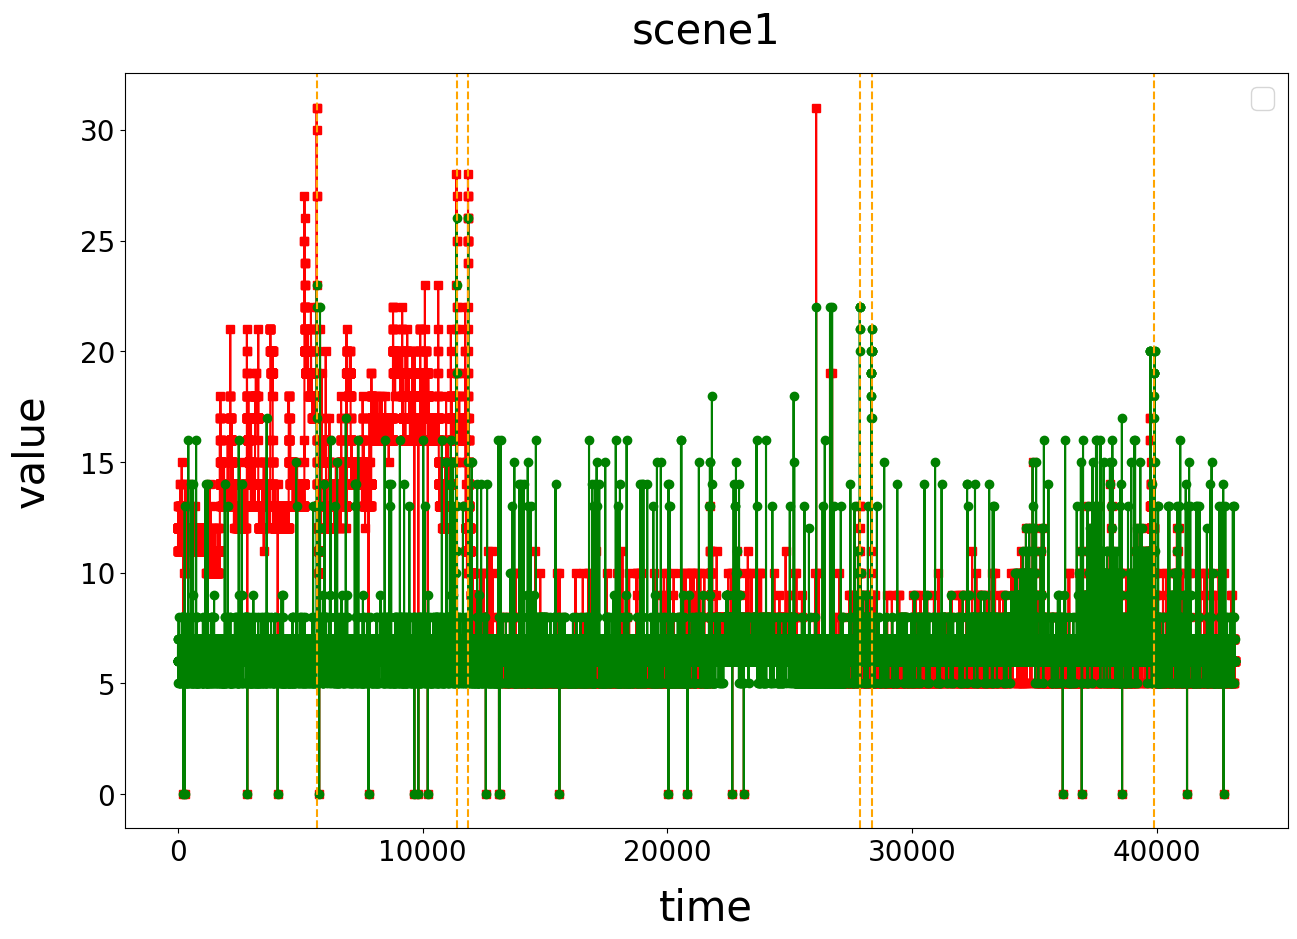

In [46]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# 使用月份當做X軸資料
month = time

# 設定圖片大小為長15、寬10
plt.figure(figsize=(15,10),dpi=100,linewidth = 2)

# 把資料放進來並指定對應的X軸、Y軸的資料，用方形做標記(s-)，並指定線條顏色為紅色，使用label標記線條含意
plt.plot(time,plot_bed,'s-',color = 'r')
plt.plot(time,plot_floor,'o-',color = 'g')
#plt.plot(time,plot_old,'h-',color = 'b')

[plt.axvline(i, color='orange', linestyle='--') for i in find_time]

# plot ground truth
#plt.axvline(x=18, ymin=0, ymax=1,color = 'orange')


# 設定圖片標題，以及指定字型設定，x代表與圖案最左側的距離，y代表與圖片的距離
plt.title("scene1", x=0.5, y=1.03,fontsize = 30)

# 设置刻度字体大小
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# 標示x軸(labelpad代表與圖片的距離)
plt.xlabel("time", fontsize=30, labelpad = 15)

# 標示y軸(labelpad代表與圖片的距離)
plt.ylabel("value", fontsize=30, labelpad = 20)

# 顯示出線條標記位置
plt.legend(loc = "best", fontsize=20)
plt.show()